# Employee Attrition Prediction Dataset
 - Problem: Classification
 - Dataset: https://www.kaggle.com/datasets/stealthtechnologies/employee-attrition-dataset?ref=blog.techiescamp.com&select=train.csv

## EDA

### Load the libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.width', None)
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 50)

### Load the dataset

In [14]:
data = pd.read_csv('data.csv')

### Dataset insight

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59602 entries, 0 to 59601
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               59602 non-null  int64  
 1   Age                       59601 non-null  float64
 2   Gender                    59602 non-null  object 
 3   Years at Company          59602 non-null  int64  
 4   Job Role                  59600 non-null  object 
 5   Monthly Income            59602 non-null  int64  
 6   Work-Life Balance         59601 non-null  object 
 7   Job Satisfaction          59601 non-null  object 
 8   Performance Rating        59602 non-null  object 
 9   Number of Promotions      59602 non-null  int64  
 10  Overtime                  59602 non-null  object 
 11  Distance from Home        59602 non-null  int64  
 12  Education Level           59602 non-null  object 
 13  Marital Status            59602 non-null  object 
 14  Number

### Describe dataset

In [16]:
data.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,59602.000000,59601.000000,59602.000000,59602.000000,59602.000000,59602.000000,59601.000000,59602.000000
mean,37224.620600,38.566131,15.754153,7302.451159,0.832539,50.006913,1.648026,55.759001
std,21520.588369,12.079699,11.245673,2151.529057,0.994975,28.466110,1.555680,25.411232
min,1.000000,18.000000,1.000000,1316.000000,0.000000,1.000000,0.000000,2.000000
25%,18575.500000,28.000000,7.000000,5658.000000,0.000000,25.000000,0.000000,36.000000
50%,37207.500000,39.000000,13.000000,7354.000000,1.000000,50.000000,1.000000,56.000000
75%,55875.750000,49.000000,23.000000,8880.750000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


### Check the numeric column distribution

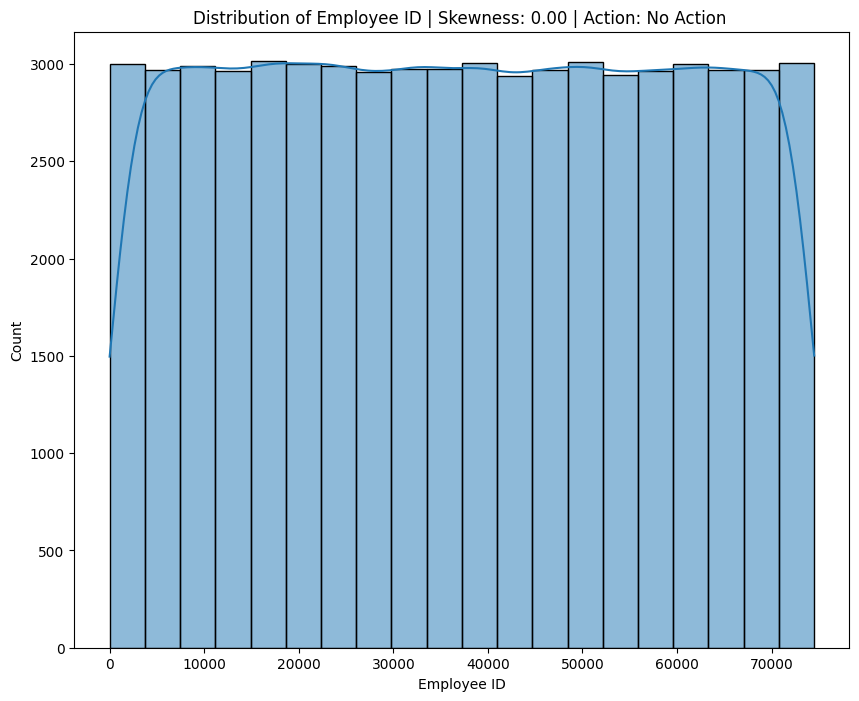

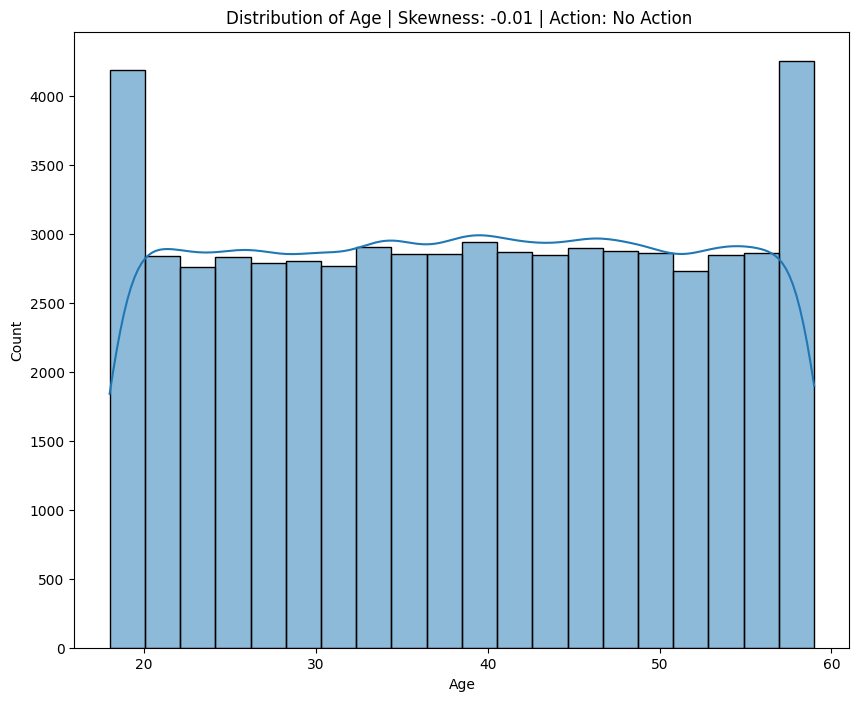

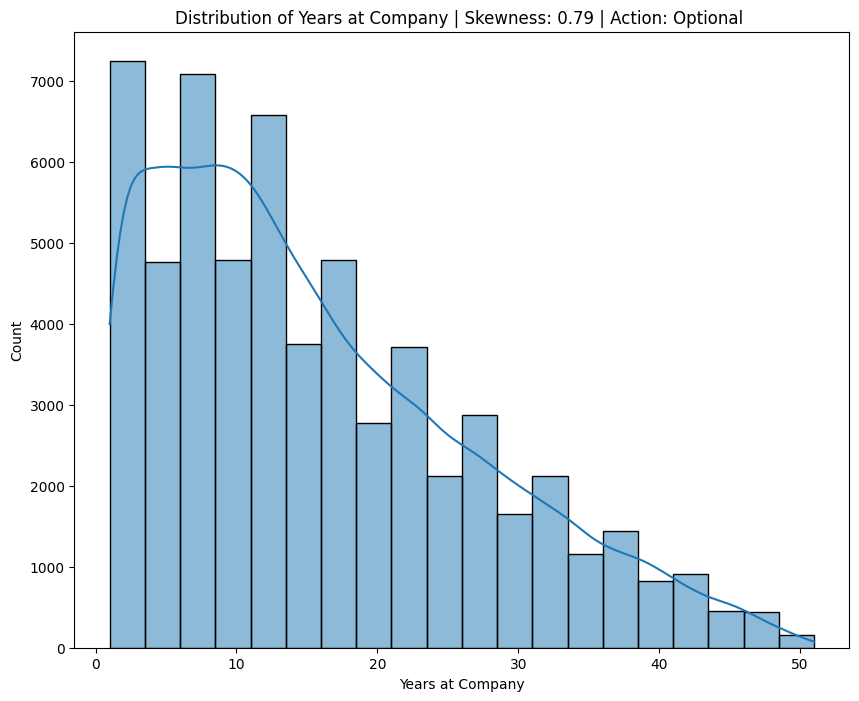

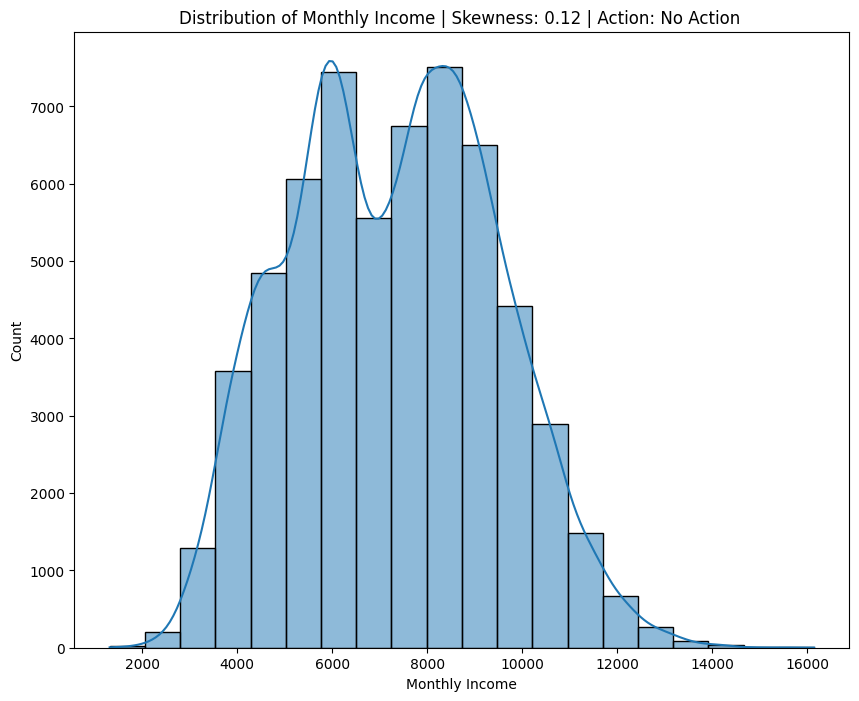

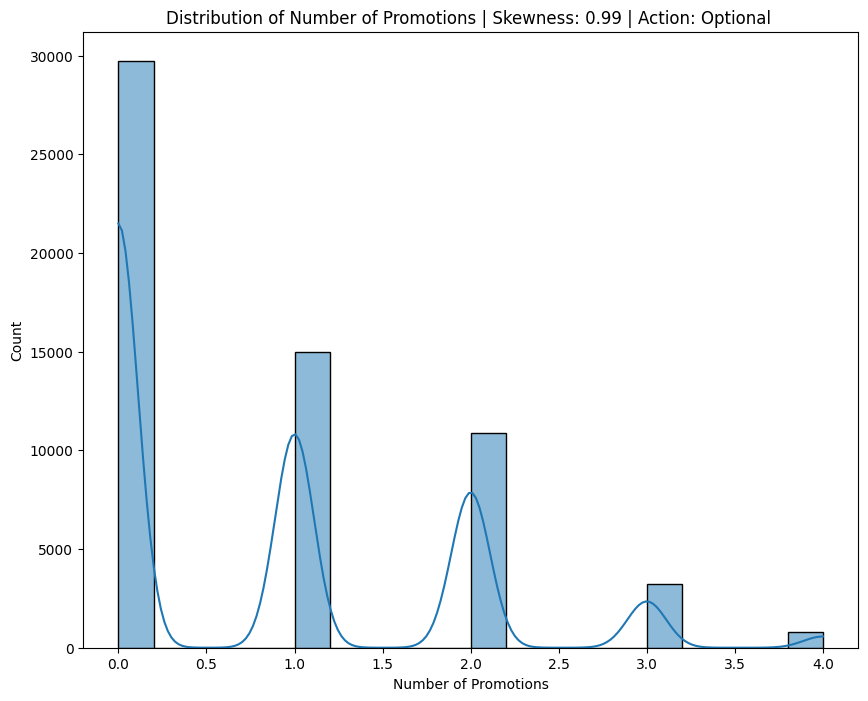

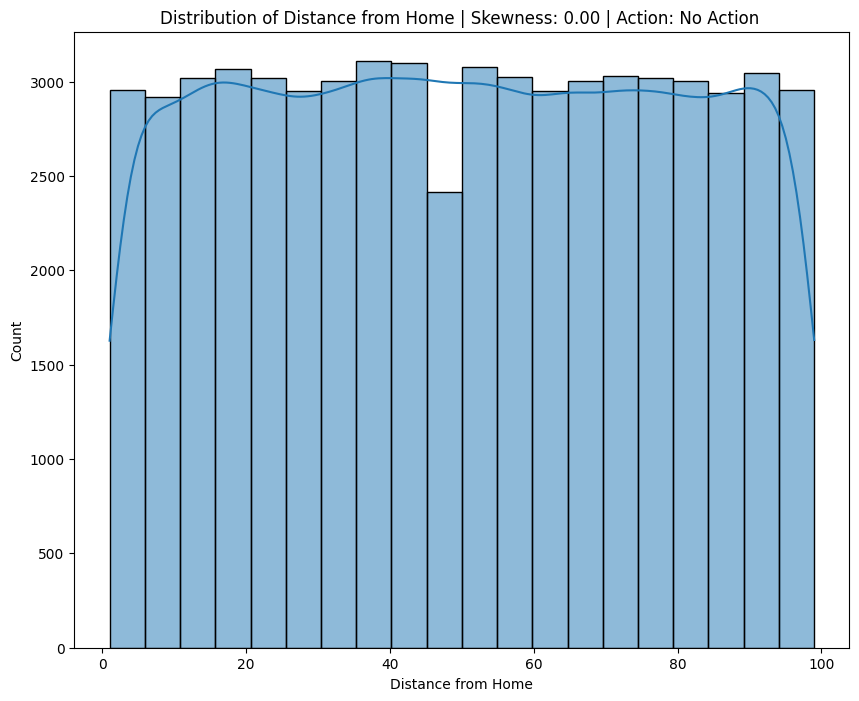

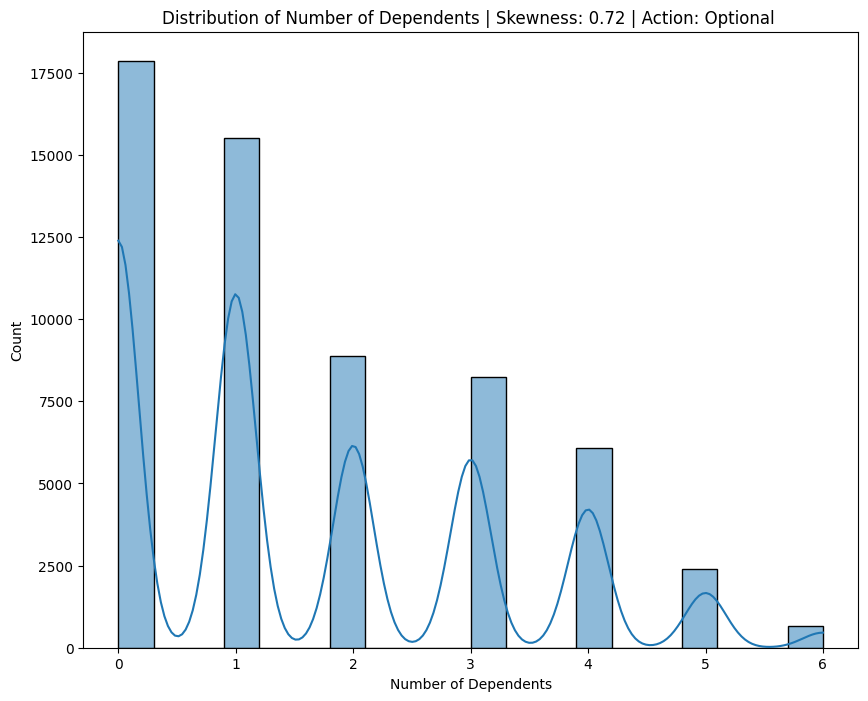

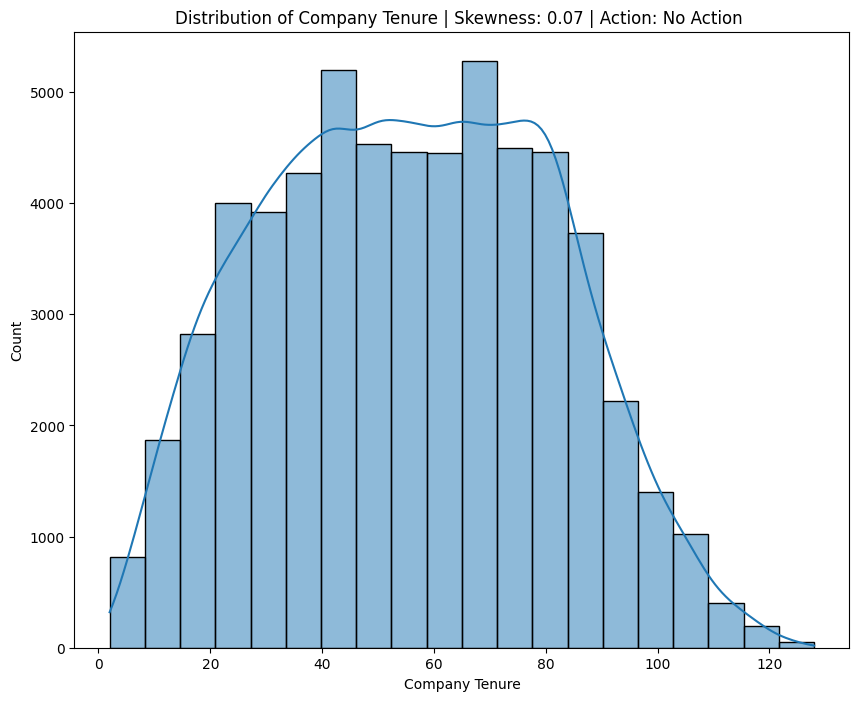

In [17]:
for col in data.select_dtypes(include=[np.number]):

    skew = data[col].dropna().skew()

    if skew < 0.5:
        action = "No Action"
    elif skew < 1:
        action = "Optional"
    else:
        action = "Action Required"

    plt.figure(figsize=(10,8))
    ax = sns.histplot(data[col].dropna(), kde=True, bins=20, palette="Set2")
    plt.title(f"Distribution of {col} | Skewness: {skew:.2f} | Action: {action} ")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


### Check the categorical column distribution

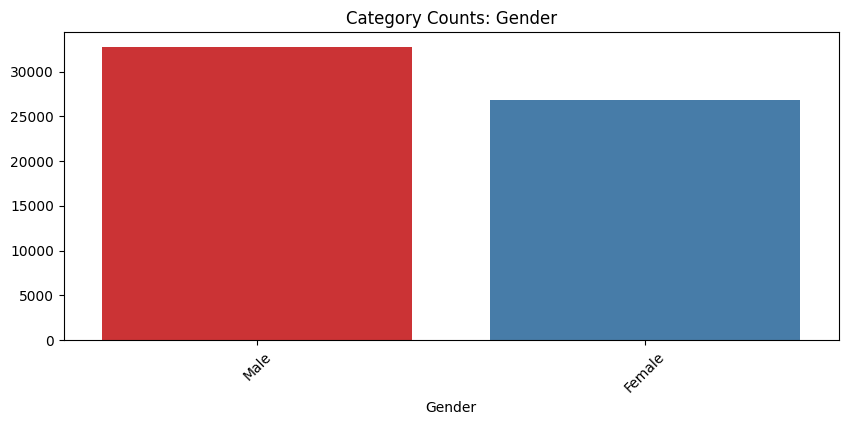

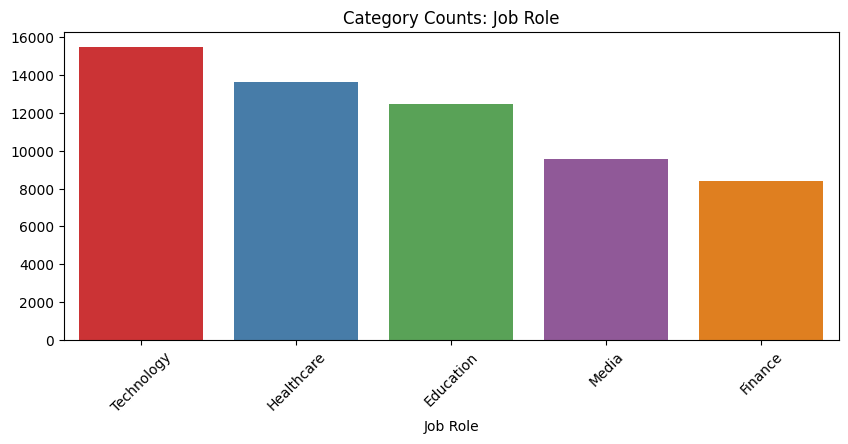

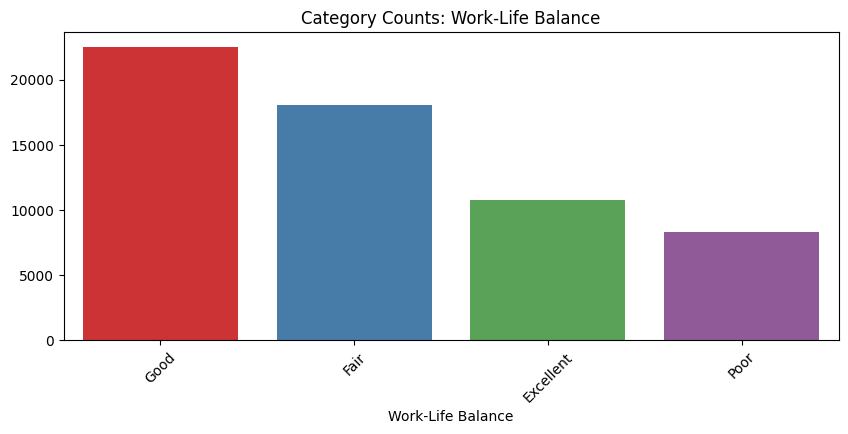

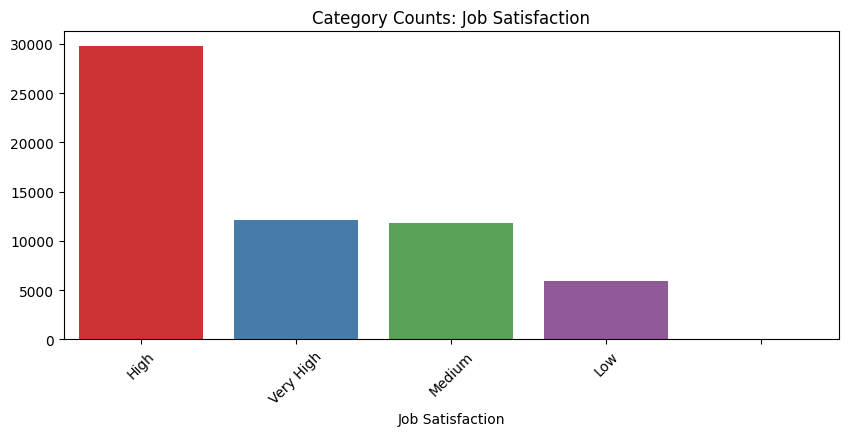

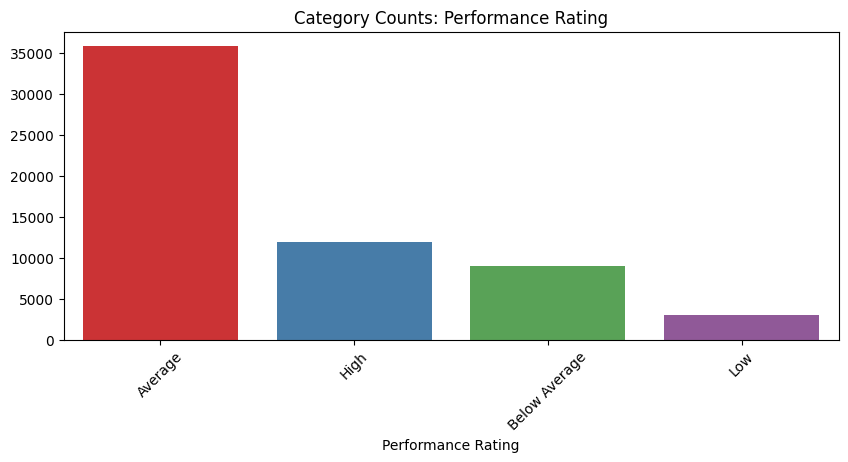

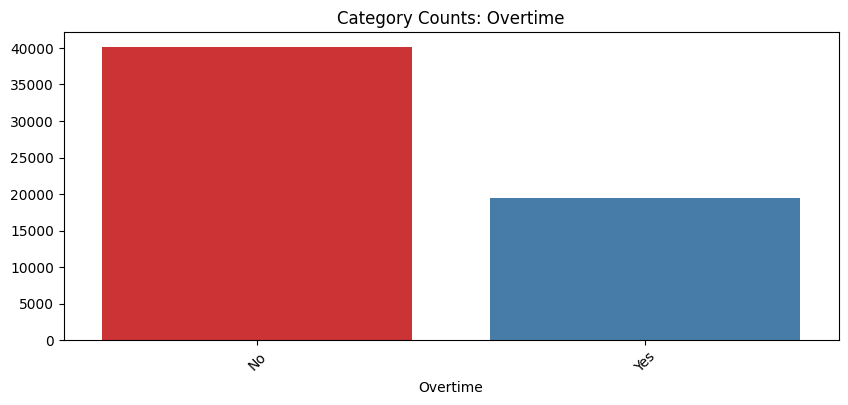

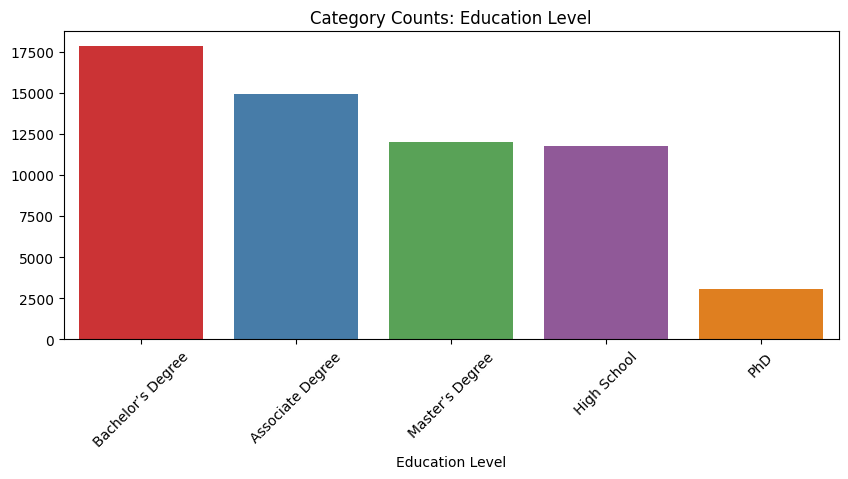

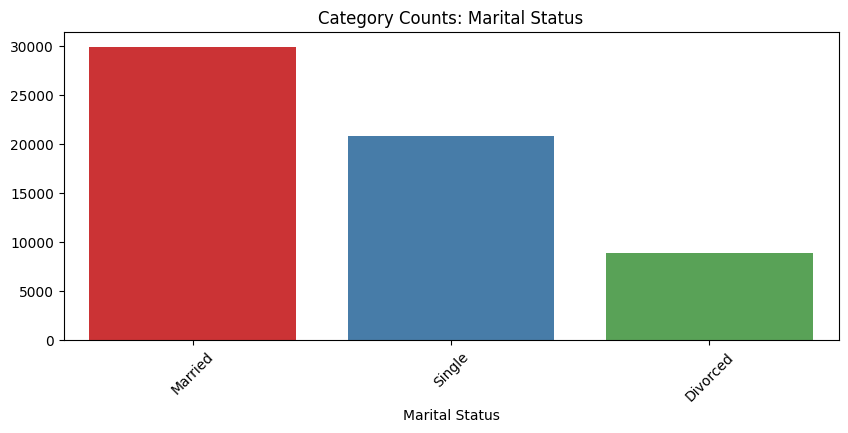

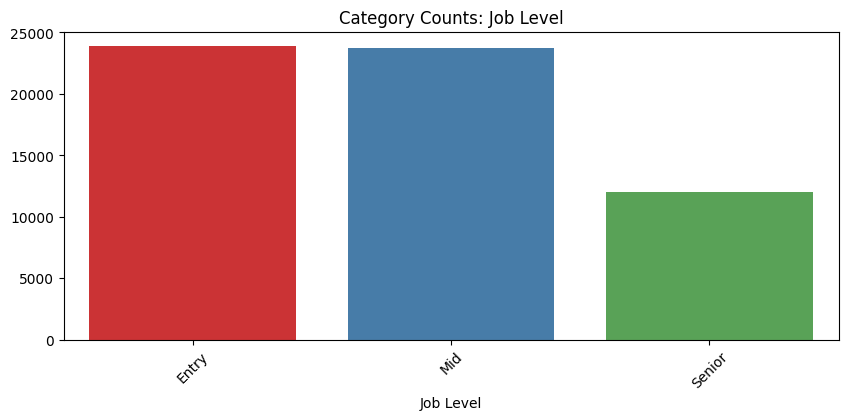

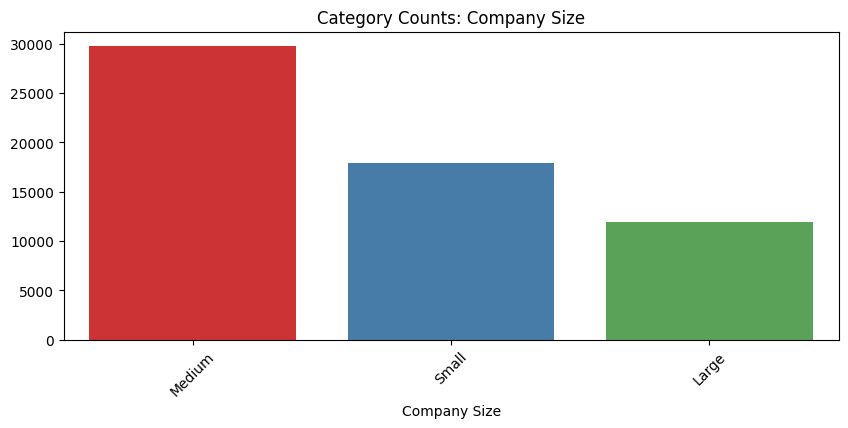

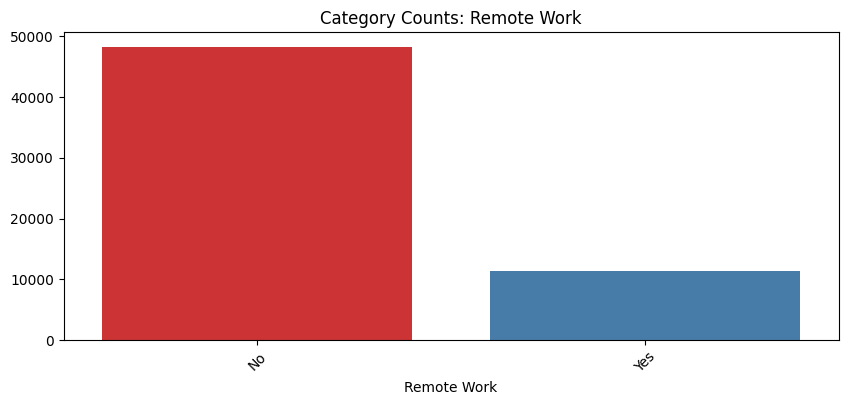

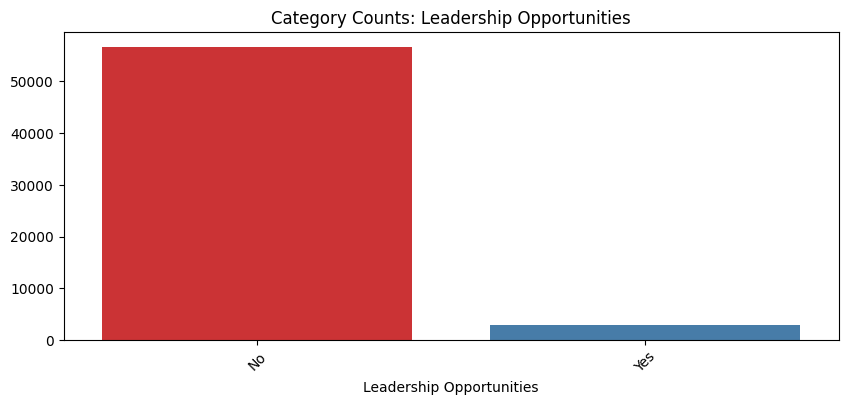

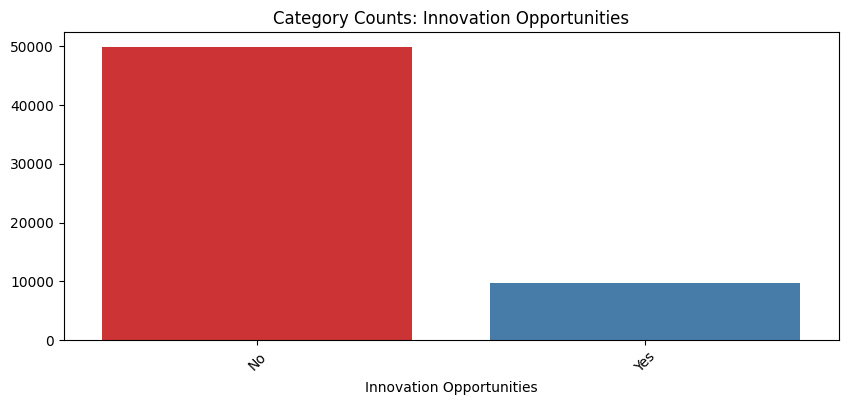

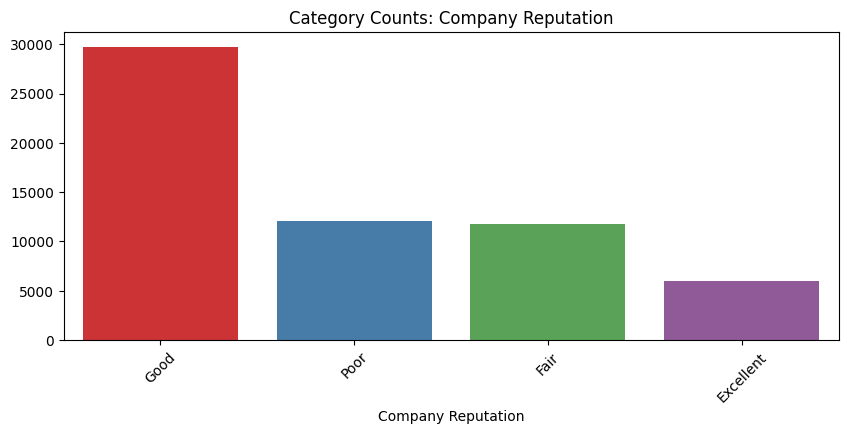

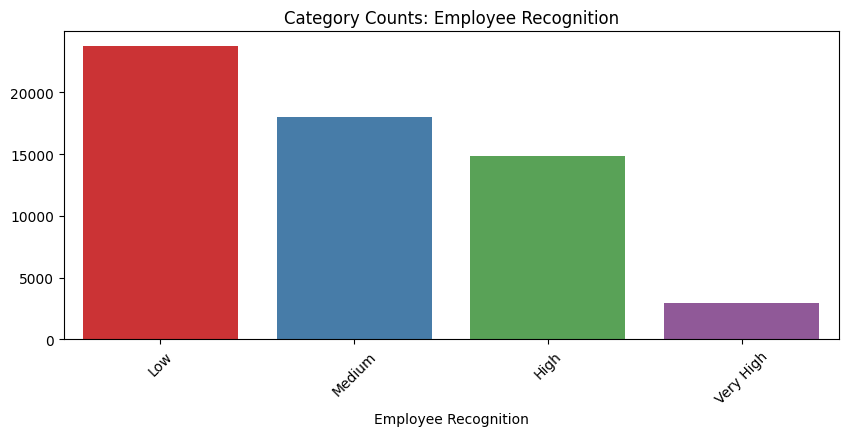

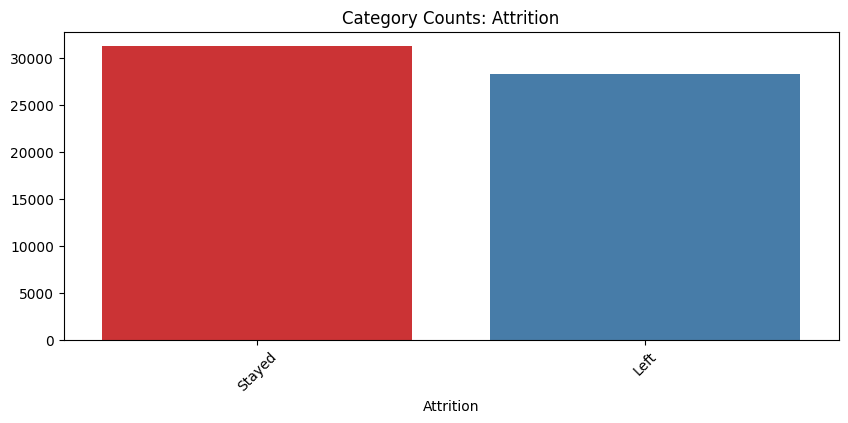

In [18]:
for col in data.select_dtypes(exclude=[np.number]):
    plt.figure(figsize=(10, 4))
    ax = sns.barplot(x=data[col].value_counts().index, y=data[col].value_counts().values, palette="Set1")
    plt.title(f"Category Counts: {col}")
    plt.xticks(rotation=45)
    plt.show()

### Bivarient analysis

#### Numeric V/s categorical analysis


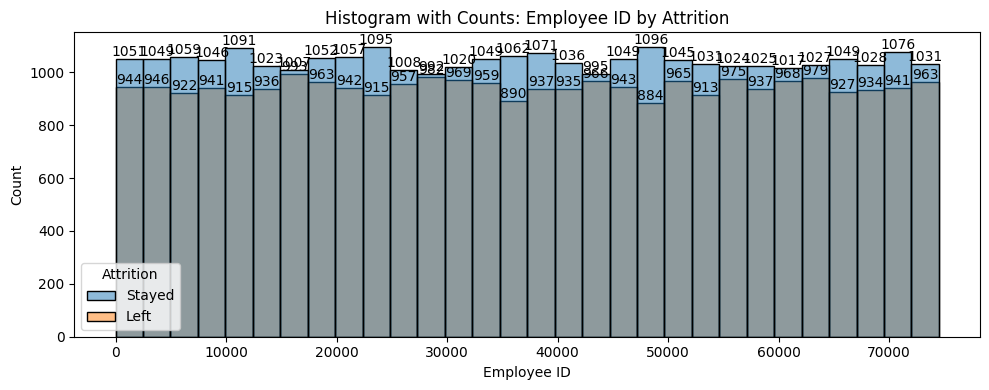

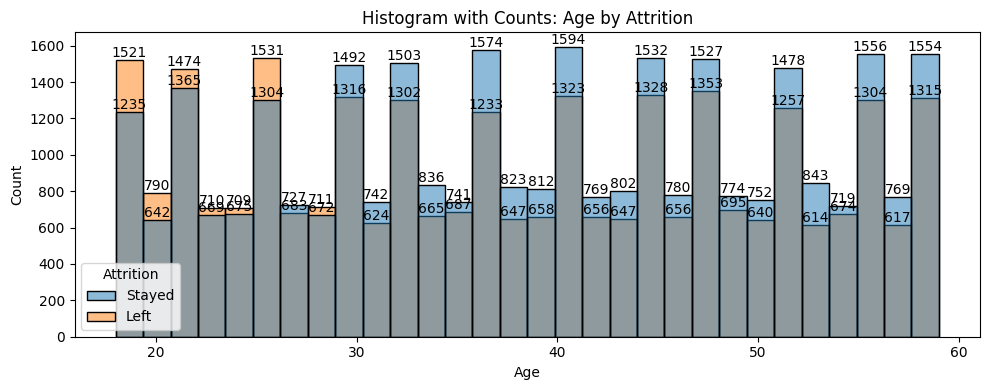

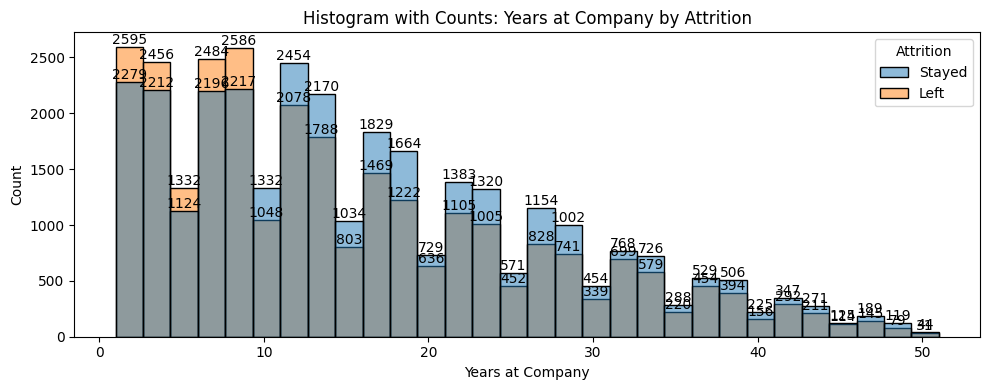

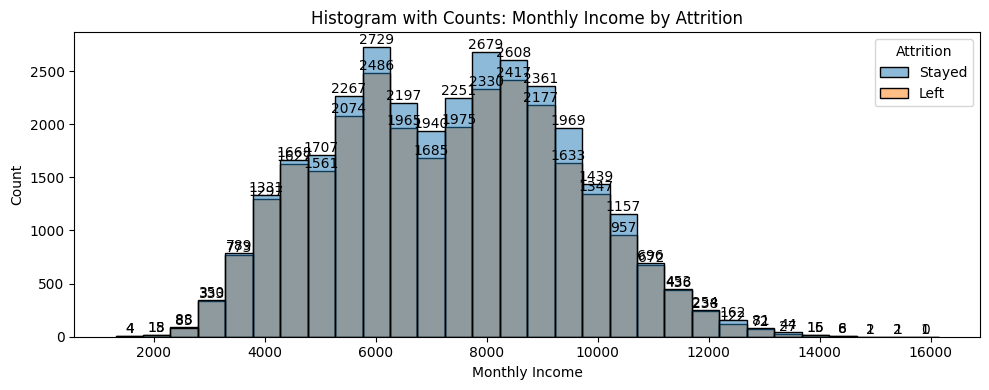

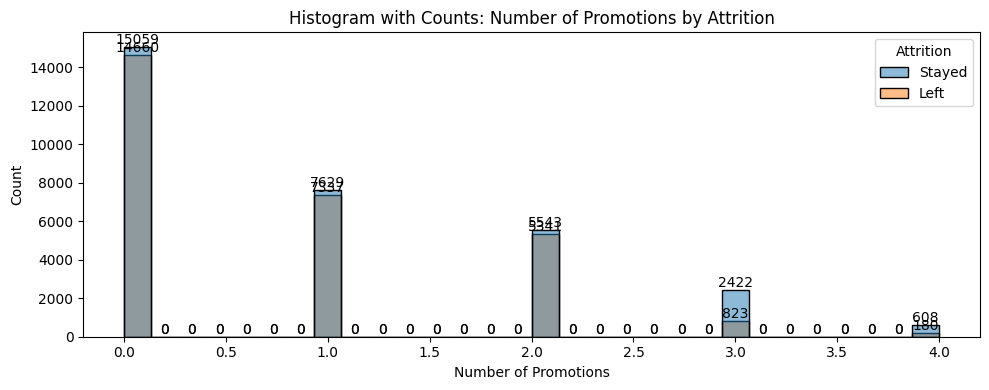

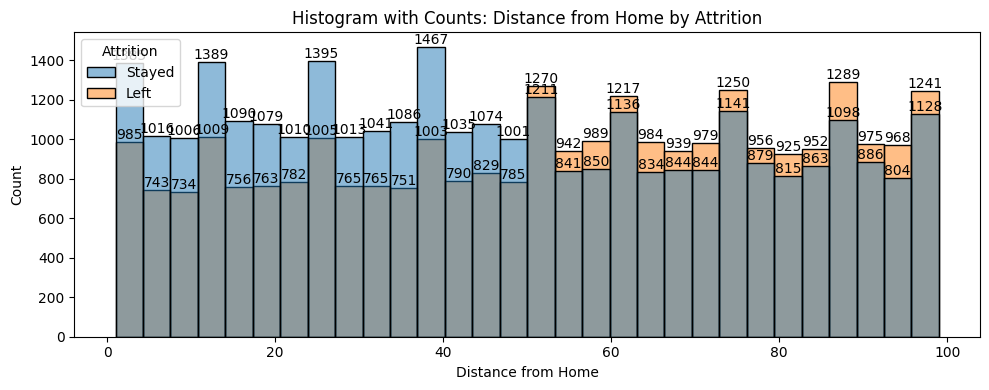

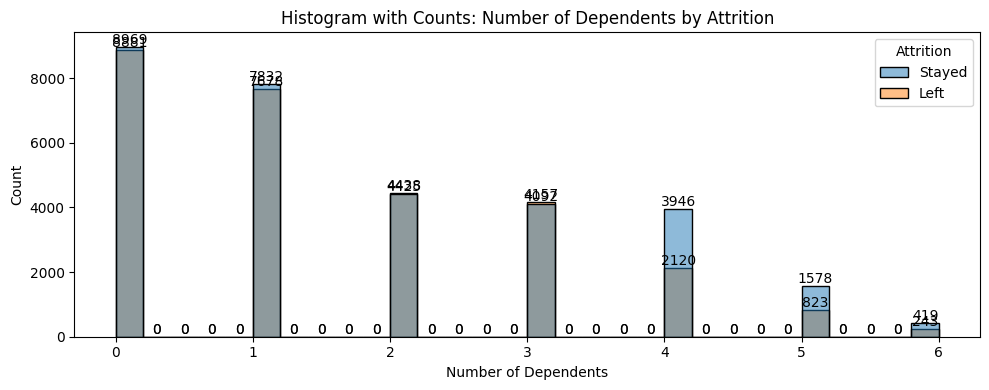

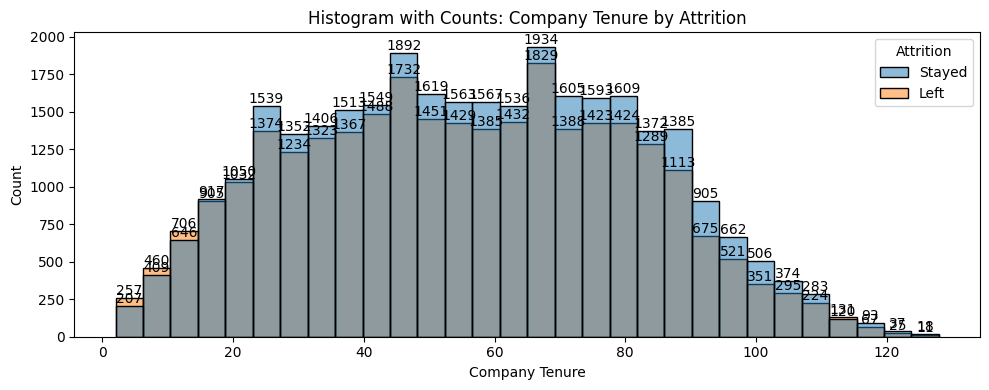

In [19]:

num_cols = data.select_dtypes(include=['number']).columns

for col in num_cols:
    plt.figure(figsize=(10, 4))

    ax = sns.histplot(
        data=data,
        x=col,
        hue="Attrition",
        bins=30,
        kde=False
    )

    # Add count labels on top of each bin
    for container in ax.containers:
        ax.bar_label(container, fmt="%d")

    plt.title(f"Histogram with Counts: {col} by Attrition")
    plt.tight_layout()
    plt.show()


#### Categotical V/s Categorical analysis

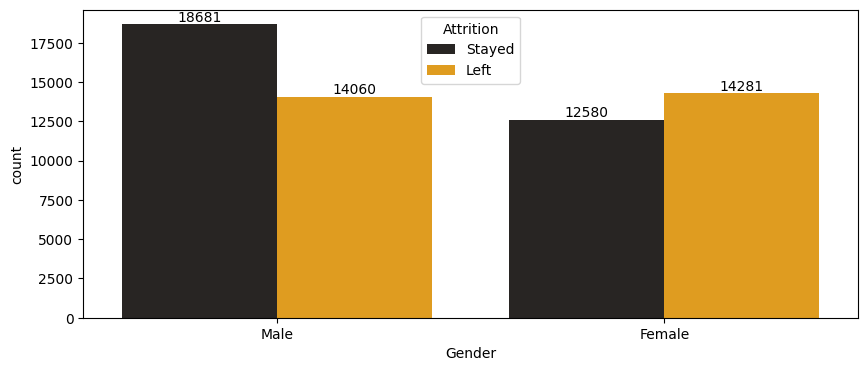

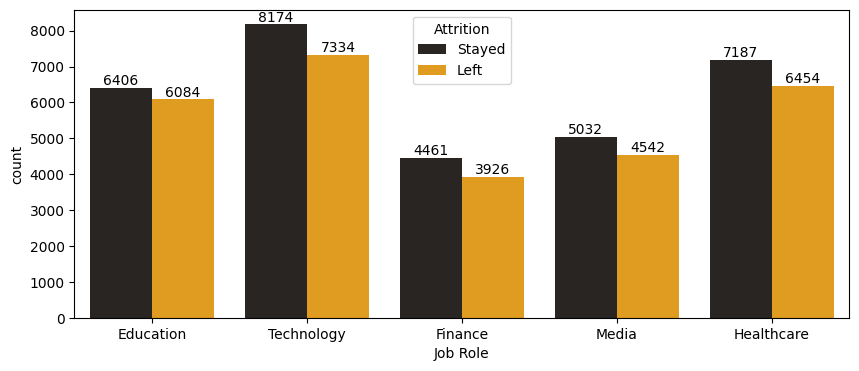

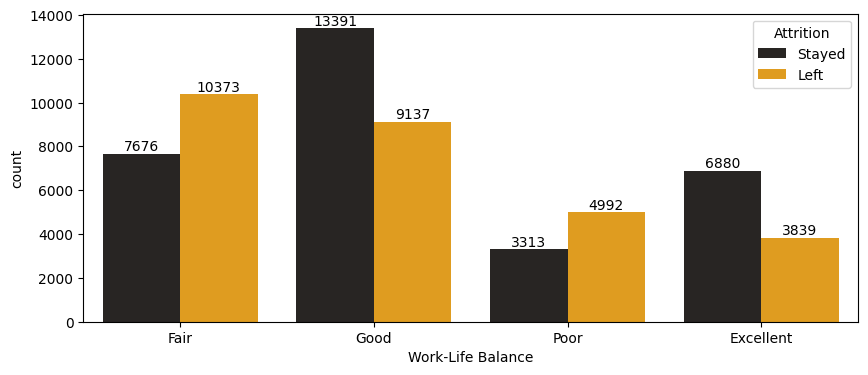

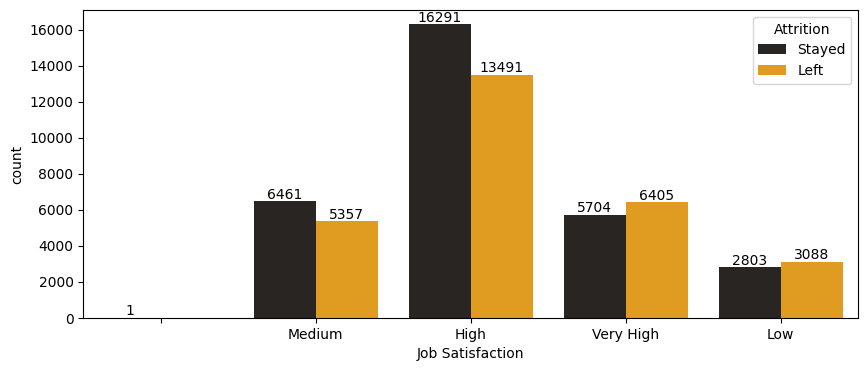

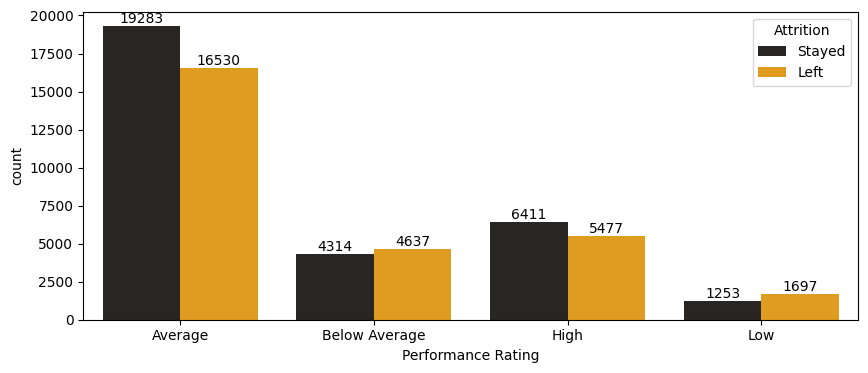

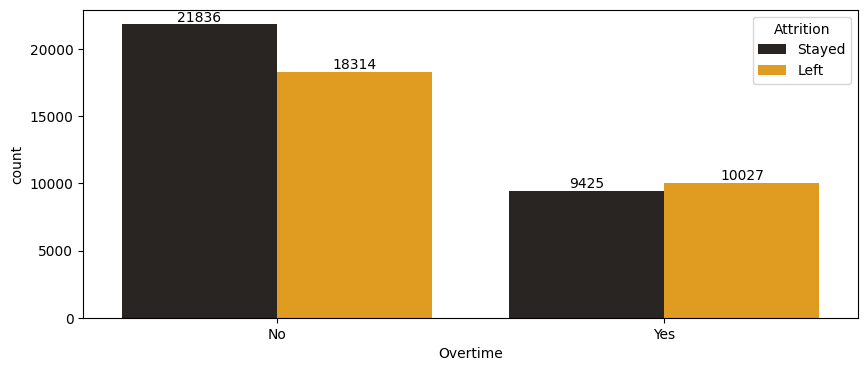

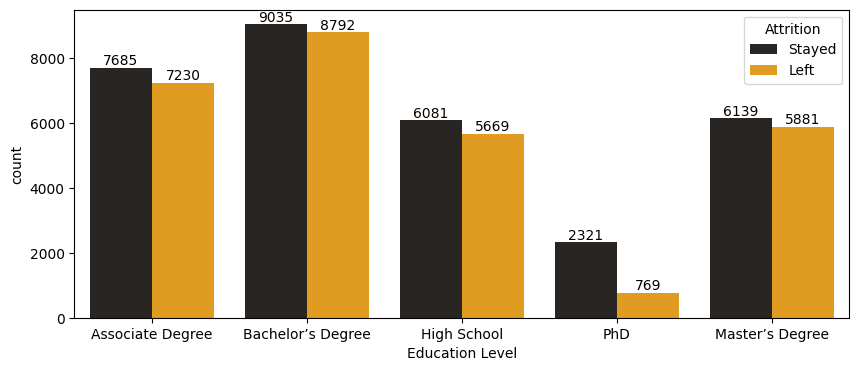

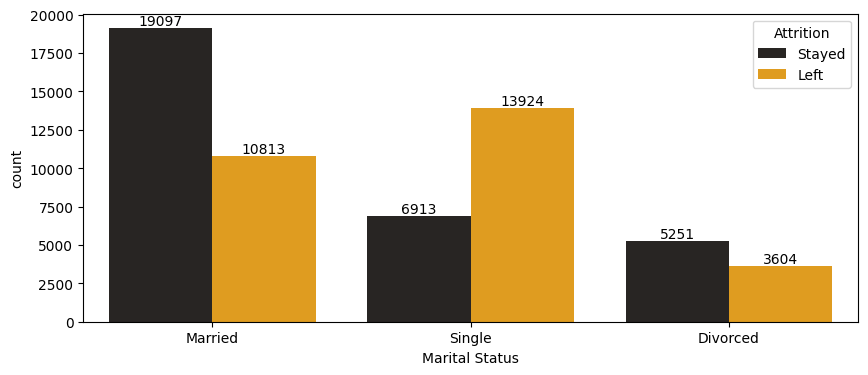

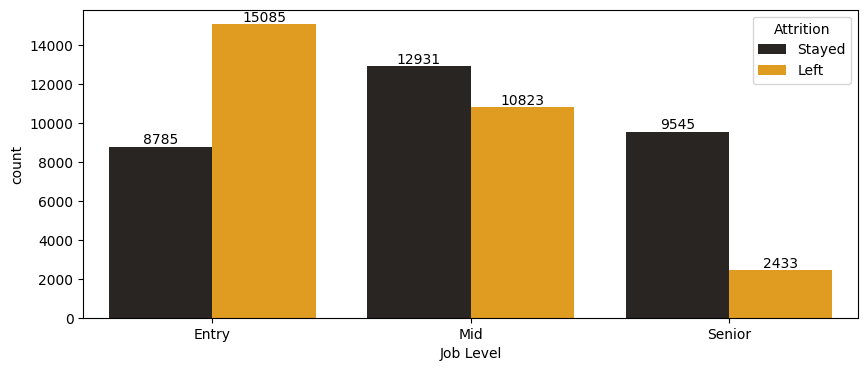

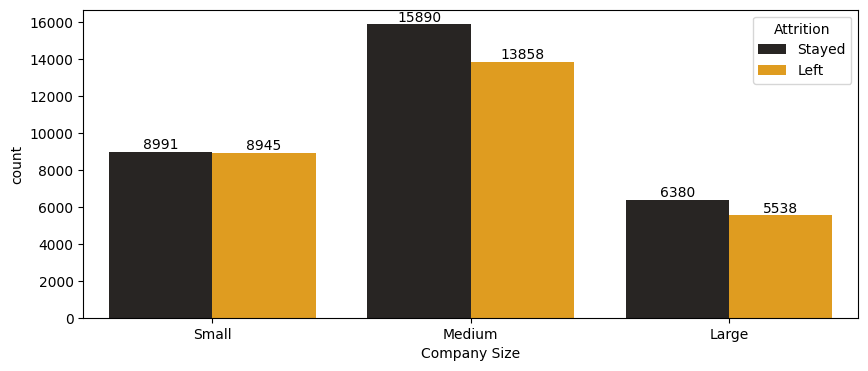

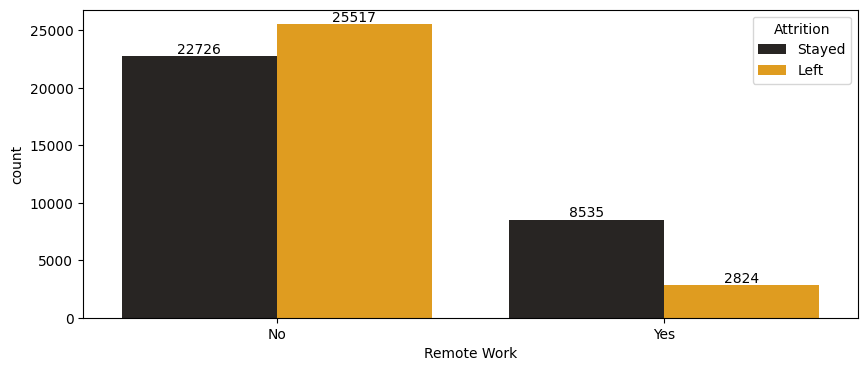

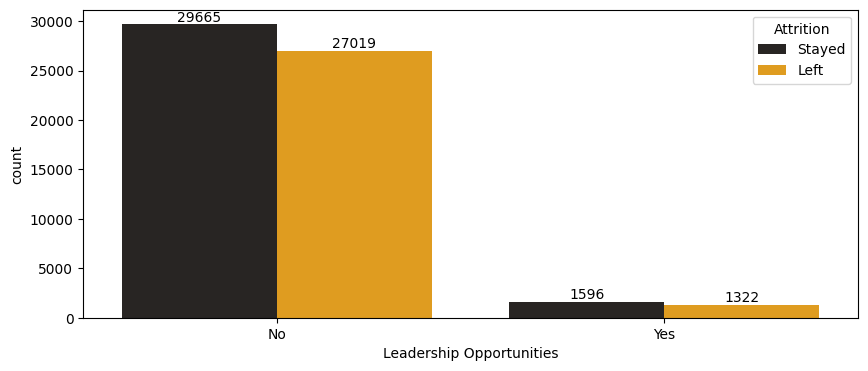

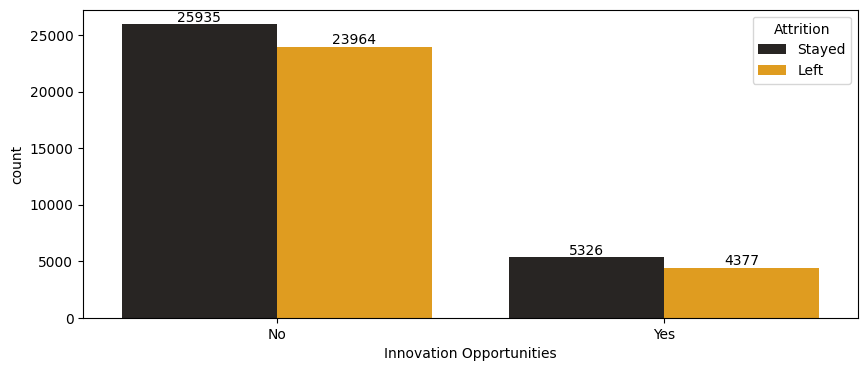

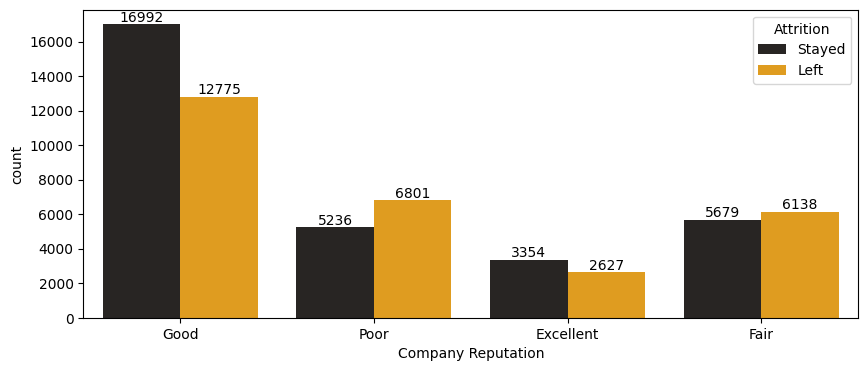

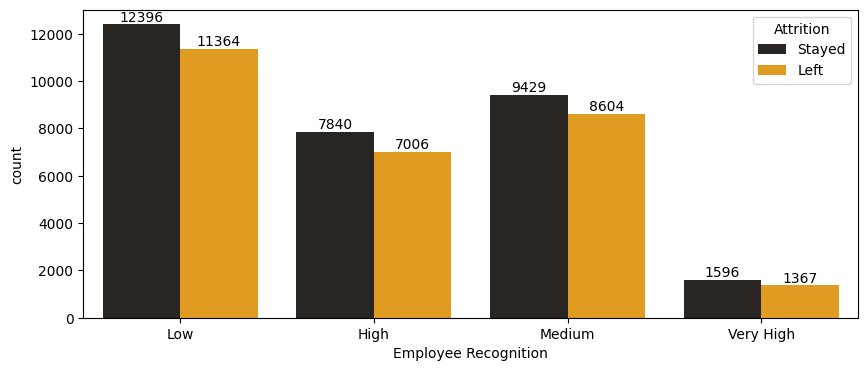

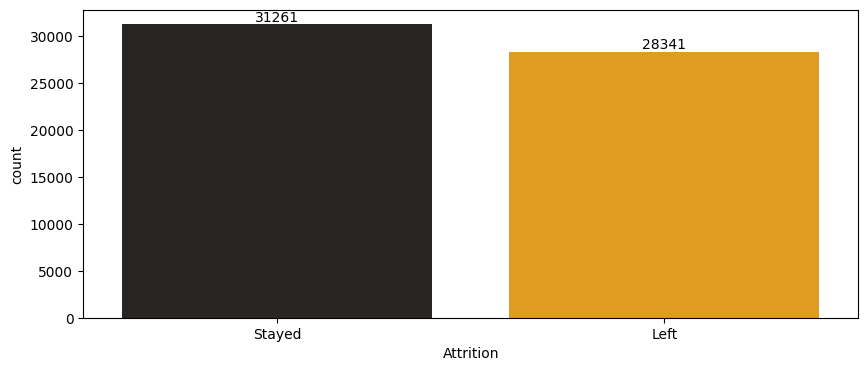

In [20]:
for col in data.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 4))
    ax = sns.countplot(data=data, x=data[col], hue='Attrition', palette='dark:orange')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])

### Check target variable distribution(Data balanced)

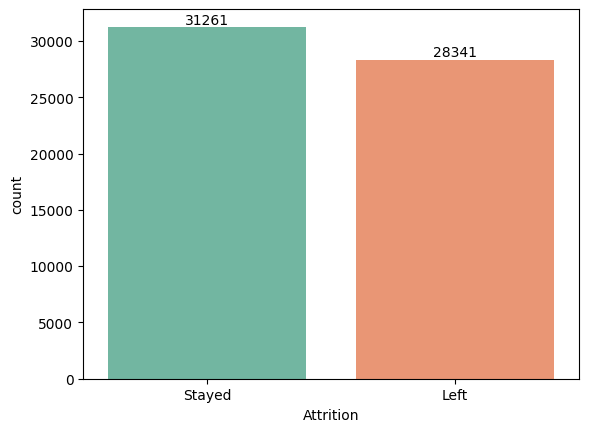

In [21]:
ax = sns.countplot(x=data['Attrition'], palette="Set2")

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

### Check missing values

In [22]:
data.isnull().sum()

Employee ID                 0
Age                         1
Gender                      0
Years at Company            0
Job Role                    2
Monthly Income              0
Work-Life Balance           1
Job Satisfaction            1
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        1
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

### Check Duplicate values

In [23]:
data.duplicated().sum()

np.int64(4)

### Shape of dataset

In [24]:
data.shape

(59602, 24)

### List the categorical and numeric columns

In [25]:
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = data.select_dtypes(exclude=[np.number]).columns.tolist()
dict_of_dtypes = {
            "numeric_columns": numeric_cols,
            "categorical_columns": categorical_cols
        }
print(f"List of Numeric columns: {dict_of_dtypes['numeric_columns']}")
print(f"List of Categorical columns: {dict_of_dtypes['categorical_columns']}")

List of Numeric columns: ['Employee ID', 'Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'Company Tenure']
List of Categorical columns: ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', 'Attrition']


### Categorical columns details

In [26]:
for col in dict_of_dtypes['categorical_columns']:
    print(f"********* Col: {col} | Unique: {data[col].nunique()} *********")
    print(data[col].unique())
    print("\n")

********* Col: Gender | Unique: 2 *********
['Male' 'Female']


********* Col: Job Role | Unique: 5 *********
['Education' 'Technology' 'Finance' nan 'Media' 'Healthcare']


********* Col: Work-Life Balance | Unique: 4 *********
['Fair' 'Good' 'Poor' nan 'Excellent']


********* Col: Job Satisfaction | Unique: 5 *********
[' ' 'Medium' 'High' nan 'Very High' 'Low']


********* Col: Performance Rating | Unique: 4 *********
['Average' 'Below Average' 'High' 'Low']


********* Col: Overtime | Unique: 2 *********
['No' 'Yes']


********* Col: Education Level | Unique: 5 *********
['Associate Degree' 'Bachelor’s Degree' 'High School' 'PhD'
 'Master’s Degree']


********* Col: Marital Status | Unique: 3 *********
['Married' 'Single' 'Divorced']


********* Col: Job Level | Unique: 3 *********
['Entry' 'Mid' 'Senior']


********* Col: Company Size | Unique: 3 *********
['Small' 'Medium' 'Large']


********* Col: Remote Work | Unique: 2 *********
['No' 'Yes']


********* Col: Leadership Opport

### Check the skewness

In [27]:
skew_report = {}
for col in data.select_dtypes(include=[np.number]):
    mean_val = data[col].mean()
    median_val = data[col].median()
    std_val = data[col].std()
    diff_val = round(abs(mean_val - median_val), 2)

    ratio = 0 if std_val == 0 else round(diff_val/std_val, 2)

    if ratio > 0.3:
         skew_due_to_outlier = "Likely Outlier-Driven"
    else:
        skew_due_to_outlier = "Not Outlier-Driven"

    skew = data[col].dropna().skew()

    if skew > 0:
        direction = "Positive skewed"
    elif skew < 0:
        direction = "Negative skewed"
    else:
        direction = "Roughly Symmetric"

    if abs(skew) < 0.5:
        skew_interpretation = "Fairly Symmetric - No transformation needed"
    elif abs(skew) > 1:
        skew_interpretation = "Moderately Skewed - Consider transformation if critical"
    else:
        skew_interpretation = "Highly Skewed - Transformation Recommended (log/sqrt/BoxCox)"


    skew_report[col] = (round(skew, 2), direction, skew_interpretation, mean_val, median_val, diff_val, ratio, skew_due_to_outlier)

skew_df = pd.DataFrame(skew_report, index=["Skewness","Direction","Skew interpretation","Mean", "Median","Diff Mean-Median","Diff/Std Deviation","Skew Due to Outlier"]).T
skew_df

,Skewness,Direction,Skew interpretation,Mean,Median,Diff Mean-Median,Diff/Std Deviation,Skew Due to Outlier
Employee ID,0.0,Positive skewed,Fairly Symmetric - No transformation needed,37224.6206,37207.5,17.12,0.0,Not Outlier-Driven
Age,-0.01,Negative skewed,Fairly Symmetric - No transformation needed,38.566131,39.0,0.43,0.04,Not Outlier-Driven
Years at Company,0.79,Positive skewed,Highly Skewed - Transformation Recommended (lo...,15.754153,13.0,2.75,0.24,Not Outlier-Driven
Monthly Income,0.12,Positive skewed,Fairly Symmetric - No transformation needed,7302.451159,7354.0,51.55,0.02,Not Outlier-Driven
Number of Promotions,0.99,Positive skewed,Highly Skewed - Transformation Recommended (lo...,0.832539,1.0,0.17,0.17,Not Outlier-Driven
Distance from Home,0.0,Positive skewed,Fairly Symmetric - No transformation needed,50.006913,50.0,0.01,0.0,Not Outlier-Driven
Number of Dependents,0.72,Positive skewed,Highly Skewed - Transformation Recommended (lo...,1.648026,1.0,0.65,0.42,Likely Outlier-Driven
Company Tenure,0.07,Positive skewed,Fairly Symmetric - No transformation needed,55.759001,56.0,0.24,0.01,Not Outlier-Driven


### Correlation

#### Numeric vs Numeric (Pearson)

In [30]:
def get_column_types():
    numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
    return numeric_cols, categorical_cols

def numeric_correlation():
        numeric_cols, _ = get_column_types()
        if len(numeric_cols) < 2:
            return "Not enough numeric columns for correlation"
        corr_matrix = data[numeric_cols].corr()
        return corr_matrix

numeric_correlation()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
Employee ID,1.000000,-0.000035,-0.001200,0.003027,0.004430,0.009398,-0.005501,-0.001509
Age,-0.000035,1.000000,0.539807,-0.001879,0.000173,-0.007114,0.002880,0.237110
Years at Company,-0.001200,0.539807,1.000000,-0.005256,-0.000237,-0.006908,0.003952,0.442183
Monthly Income,0.003027,-0.001879,-0.005256,1.000000,0.006435,-0.002581,0.002586,-0.005331
Number of Promotions,0.004430,0.000173,-0.000237,0.006435,1.000000,-0.007874,-0.000550,0.003901
Distance from Home,0.009398,-0.007114,-0.006908,-0.002581,-0.007874,1.000000,0.000685,-0.005649
Number of Dependents,-0.005501,0.002880,0.003952,0.002586,-0.000550,0.000685,1.000000,0.001567
Company Tenure,-0.001509,0.237110,0.442183,-0.005331,0.003901,-0.005649,0.001567,1.000000


#### Correlation with target -  Consolidated

In [31]:
from scipy.stats import pointbiserialr, f_oneway, kruskal, chi2_contingency
from sklearn.preprocessing import LabelEncoder
    # -----------------------------
    # Correlation with target (all cases)
    # -----------------------------
def correlation_with_target(target_col, threshold=None, business_decision=True):
    """
    Automatically choose test based on column types.
    threshold: absolute correlation / p-value threshold to flag weak predictors
    business_decision: if True, remove columns flagged as weak
    """
    numeric_cols, categorical_cols = get_column_types()
    results = []

    target_type = 'numeric' if target_col in numeric_cols else 'categorical'

    for col in data.columns:
        if col == target_col:
            continue

        col_type = 'numeric' if col in numeric_cols else 'categorical'

        # Clean pair dataset
        pair_df = data[[col, target_col]].replace([np.inf, -np.inf], np.nan).dropna()
        if pair_df.empty:
            continue

        corr_value = None
        p_value = None

        # Numeric vs Numeric
        if col_type == 'numeric' and target_type == 'numeric':
            corr_value = pair_df[[col, target_col]].corr().iloc[0, 1]

        # Numeric vs Binary target
        elif col_type == 'numeric' and target_type == 'categorical':
            if pair_df[target_col].nunique() == 2:
                le = LabelEncoder()
                y_encoded = le.fit_transform(pair_df[target_col])
                corr_value, p_value = pointbiserialr(y_encoded, pair_df[col])
            else:
                le = LabelEncoder()
                y_encoded = le.fit_transform(pair_df[target_col])
                groups = [pair_df[col][y_encoded == cls] for cls in np.unique(y_encoded)]
                corr_value, p_value = f_oneway(*groups)

        # Categorical vs Numeric
        elif col_type == 'categorical' and target_type == 'numeric':
            le = LabelEncoder()
            x_encoded = le.fit_transform(pair_df[col])
            groups = [pair_df[target_col][x_encoded == cls] for cls in np.unique(x_encoded)]
            corr_value, p_value = f_oneway(*groups)

        # Categorical vs Categorical (Chi-Square)
        elif col_type == 'categorical' and target_type == 'categorical':
            ct = pd.crosstab(pair_df[col], pair_df[target_col])
            chi2_stat, p_value, dof, ex = chi2_contingency(ct)
            corr_value = chi2_stat


        # Decide action based on threshold
        if threshold is not None:
            if corr_value is not None:
                if abs(corr_value) >= threshold:
                    action = "Keep"
                    meaning = "Strong predictor"
                else:
                    action = "Consider Drop"
                    meaning = "Weak predictor"
            else:
                action = "Keep"
                meaning = "Unknown / Not numeric"
        else:
            action = "Keep"
            meaning = "No threshold set"

        results.append({
            "Feature": col,
            "Correlation / Test Stat": corr_value,
            "p-value": p_value,
            "Action": action,
            "Meaning": meaning
        })

    result_df = pd.DataFrame(results)
    if business_decision and threshold is not None:
        # drop weak predictors automatically
        weak_features = result_df[result_df['Action'] == 'Consider Drop']['Feature'].tolist()
        print(f"Suggested to drop (based on threshold={threshold}): {weak_features}")
    return result_df

In [407]:
# Correlation with target
target_analysis = correlation_with_target(target_col='Attrition', threshold=0.3, business_decision=True)
target_analysis

Suggested to drop (based on threshold=0.3): ['Employee ID', 'Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'Company Tenure']


,Feature,Correlation / Test Stat,p-value,Action,Meaning
0,Employee ID,-0.002610,5.239744e-01,Consider Drop,Weak predictor
1,Age,0.048857,7.833094e-33,Consider Drop,Weak predictor
2,Gender,617.935042,2.103193e-136,Keep,Strong predictor
3,Years at Company,0.064884,1.260589e-56,Consider Drop,Weak predictor
4,Job Role,9.355872,5.279450e-02,Keep,Strong predictor
5,Monthly Income,0.011302,5.792259e-03,Consider Drop,Weak predictor
6,Work-Life Balance,2270.956811,0.000000e+00,Keep,Strong predictor
7,Job Satisfaction,278.336425,4.850542e-60,Keep,Strong predictor
8,Performance Rating,220.964624,1.242211e-47,Keep,Strong predictor
9,Number of Promotions,0.080600,1.809338e-86,Consider Drop,Weak predictor


#### numeric v/s Categorical - Correlation

In [36]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2


target = "Attrition"

# select only categorical columns except target
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove(target)

# encode all categoricals
le = LabelEncoder()
df_encoded = data[categorical_cols].apply(le.fit_transform)
y = le.fit_transform(data[target])

# run chi-square
chi_scores, p_values = chi2(df_encoded, y)

# display results
chi_results = pd.DataFrame({
    "Feature": categorical_cols,
    "Chi-Square Score": chi_scores.round(5),
    "p-value": p_values,
    "p-value_range": ["Keep" if p < 0.05 else "Consider Deletion" for p in p_values]
})

chi_results.sort_values(by="p-value")


,Feature,Chi-Square Score,p-value,p-value_range
8,Job Level,4114.86638,0.000000e+00,Keep
10,Remote Work,2344.64602,0.000000e+00,Keep
7,Marital Status,1196.85954,2.936355e-262,Keep
0,Gender,278.67122,1.462726e-62,Keep
6,Education Level,148.97732,2.900664e-34,Keep
2,Work-Life Balance,142.26036,8.530081e-33,Keep
5,Overtime,124.60402,6.213512e-29,Keep
3,Job Satisfaction,92.55049,6.562897e-22,Keep
4,Performance Rating,80.20561,3.374084e-19,Keep
13,Company Reputation,36.74481,1.346486e-09,Keep


### EDA Summary
- Dataset is of 59602 rows and 24 columns
- Dataset contains one numerical columns and many categorical features.
- No duplicate rows are present.
- No Missing values are present.
- Outliers are present in Years at Company, Monthly Income, address them using IQR capping
- Skewness is present in Years at Company, Number of Promotions, Number of Dependents address them with Box-Cox.
- Multicollinearity will check post datapreprocessing.
- Employee ID can be dropped as it doesnt add any value for problem. Though there are couple of weak predictor they are significant column for probelme.

## Data Pre-processing

In [79]:
df = data.copy()

### Data cleaning

#### Handling the Duplicate values

In [80]:
check_duplicate = df.duplicated().any()
if check_duplicate == True:
    print(f"Number of duplicate rows: {df.duplicated().sum()}")
    df.drop_duplicates(inplace=True)
    print("Duplicate rows removed")
else:
    print("No duplicate rows found")    

Number of duplicate rows: 4
Duplicate rows removed


#### Handling the missing values

In [81]:
print("Checking missing values for numeric columns")

for col in df.select_dtypes(include=[np.number]).columns:    
    if df[col].isnull().sum():
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_exist = ((df[col] < lower_bound) | (df[col] > upper_bound)).any()
        outliers_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        
        print(f"\tMissing values detected in {col} column. Checking outlier exist")
        
        if outliers_exist:
            print(f"\tOutliers detected in column: {col}, Count: {outliers_count}. Filling NaNs with median.\n")
            df[col] = df[col].fillna(df[col].median())
        else:
            print(f"\tNo outliers detected in column: {col}. Filling NaNs with mean.\n")
            df[col] = df[col].fillna(df[col].mean())
    else:
        print(f"\tNo missing values in {col} column.\n")
print("Checking missing values for categorical columns")

for col in df.select_dtypes(exclude=[np.number]).columns:
    if df[col].isnull().sum():
        print(f"\tThere are missing values in the {col} column. Filling NaNs with mode\n")
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        print(f"\tNo missing values in {col} column.\n")

Checking missing values for numeric columns
	No missing values in Employee ID column.

	Missing values detected in Age column. Checking outlier exist
	No outliers detected in column: Age. Filling NaNs with mean.

	No missing values in Years at Company column.

	No missing values in Monthly Income column.

	No missing values in Number of Promotions column.

	No missing values in Distance from Home column.

	Missing values detected in Number of Dependents column. Checking outlier exist
	No outliers detected in column: Number of Dependents. Filling NaNs with mean.

	No missing values in Company Tenure column.

Checking missing values for categorical columns
	No missing values in Gender column.

	There are missing values in the Job Role column. Filling NaNs with mode

	There are missing values in the Work-Life Balance column. Filling NaNs with mode

	There are missing values in the Job Satisfaction column. Filling NaNs with mode

	No missing values in Performance Rating column.

	No missin

### Categorical columns - Encoding

In [82]:
df.isnull().sum().sum()

np.int64(0)

### Handling encoding

#### Binary encoding

In [83]:
BINARY_MAP = {
    'Gender'                  : {'Male': 1, 'Female': 0},
    'Overtime'                : {'Yes': 1, 'No': 0},
    'Remote Work'             : {'Yes': 1, 'No': 0},
    'Leadership Opportunities': {'Yes': 1, 'No': 0},
    'Innovation Opportunities': {'Yes': 1, 'No': 0},
    'Attrition'               : {'Stayed': 0, 'Left': 1}
}

print("Performing binary encoding")
for col, mapping in BINARY_MAP.items():
    if col in df.columns:
        print(f"{col}")
        df[col] = df[col].map(mapping)

Performing binary encoding
Gender
Overtime
Remote Work
Leadership Opportunities
Innovation Opportunities
Attrition


#### Ordinal encoding

In [84]:
df['Job Satisfaction'].value_counts()

Job Satisfaction
High         29780
Very High    12109
Medium       11817
Low           5891
                 1
Name: count, dtype: int64

In [85]:
from sklearn.preprocessing import OrdinalEncoder

ORDINAL_MAPS = {
    'Job Satisfaction'    : {'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3},
    'Work-Life Balance'   : {'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3},
    'Performance Rating'  : {'Below Average': 0, 'Low': 1, 'Average': 2, 'High': 3},
    'Education Level'     : {'High School': 0, 'Associate Degree': 1, "Bachelor's Degree": 2, "Master's Degree": 3, 'PhD': 4},
    'Job Level'           : {'Entry': 0, 'Mid': 1, 'Senior': 2},
    'Company Size'        : {'Small': 0, 'Medium': 1, 'Large': 2},
    'Company Reputation'  : {'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3},
    'Employee Recognition': {'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3}
}

print("Performing Ordinal encoding")

for col, mapping in ORDINAL_MAPS.items():
    if col in df.columns:
        print(f"{col}") 
        encoder = OrdinalEncoder(categories=[list(mapping.keys())], handle_unknown='use_encoded_value', unknown_value=-1)
        df[col] = encoder.fit_transform(df[[col]])

Performing Ordinal encoding
Job Satisfaction
Work-Life Balance
Performance Rating
Education Level
Job Level
Company Size
Company Reputation
Employee Recognition


#### One Hot encoding

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59598 entries, 0 to 59601
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               59598 non-null  int64  
 1   Age                       59598 non-null  float64
 2   Gender                    59598 non-null  int64  
 3   Years at Company          59598 non-null  int64  
 4   Job Role                  59598 non-null  object 
 5   Monthly Income            59598 non-null  int64  
 6   Work-Life Balance         59598 non-null  float64
 7   Job Satisfaction          59598 non-null  float64
 8   Performance Rating        59598 non-null  float64
 9   Number of Promotions      59598 non-null  int64  
 10  Overtime                  59598 non-null  int64  
 11  Distance from Home        59598 non-null  int64  
 12  Education Level           59598 non-null  float64
 13  Marital Status            59598 non-null  object 
 14  Number of D

In [87]:
from sklearn.preprocessing import OneHotEncoder

OHE_COLS = ['Job Role', 'Marital Status']

print(f"Performing Onehot encoding: {OHE_COLS}")

ohe          = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
ohe_encoding = ohe.fit_transform(df[OHE_COLS])
ohe_df       = pd.DataFrame(ohe_encoding, columns=ohe.get_feature_names_out(OHE_COLS))
df           = df.drop(columns=OHE_COLS).reset_index(drop=True)
df           = pd.concat([df, ohe_df], axis=1)

Performing Onehot encoding: ['Job Role', 'Marital Status']


### Handle the outlier using IQR capping

In [88]:
print("Addressing outlier to Years at Company column as max value is 51. Allowed max is 40 years")

Addressing outlier to Years at Company column as max value is 51. Allowed max is 40 years


In [89]:
### Handling outlier using IQR capping method
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return series.clip(lower=lower_bound, upper=upper_bound)

columns = ['Years at Company']

for col in columns:
    df[col] = cap_outliers(df[col])

In [90]:
df['Years at Company'] = df['Years at Company'].apply(lambda x: 40 if x > 40 else x)

### Handle the skewness

In [91]:
from sklearn.preprocessing import PowerTransformer

# Select columns to transform
cols_to_transform = ['Number of Dependents','Number of Promotions','Years at Company']

print(f"Cols to handle skewness: {cols_to_transform}")
# Initialize Yeo-Johnson transformer
power_transformer = PowerTransformer(method='yeo-johnson', standardize=False)

# Fit and transform all columns at once
df[cols_to_transform] = power_transformer.fit_transform(df[cols_to_transform])

Cols to handle skewness: ['Number of Dependents', 'Number of Promotions', 'Years at Company']


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               59598 non-null  int64  
 1   Age                       59598 non-null  float64
 2   Gender                    59598 non-null  int64  
 3   Years at Company          59598 non-null  float64
 4   Monthly Income            59598 non-null  int64  
 5   Work-Life Balance         59598 non-null  float64
 6   Job Satisfaction          59598 non-null  float64
 7   Performance Rating        59598 non-null  float64
 8   Number of Promotions      59598 non-null  float64
 9   Overtime                  59598 non-null  int64  
 10  Distance from Home        59598 non-null  int64  
 11  Education Level           59598 non-null  float64
 12  Number of Dependents      59598 non-null  float64
 13  Job Level                 59598 non-null  float64
 14  Compan

#### Feature Engineering

In [93]:
df['Opportunities'] = df['Leadership Opportunities'] + df['Innovation Opportunities']
df = df.drop(columns=['Leadership Opportunities', 'Innovation Opportunities'])
df.head()

,Employee ID,Age,Gender,Years at Company,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Company Reputation,Employee Recognition,Attrition,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,Marital Status_Married,Marital Status_Single,Opportunities
0,1,56.0,1,7.540765,5209,1.0,-1.0,2.0,-0.000000,0,98,1.0,0.000000,0.0,0.0,86,0,2.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,2,46.0,0,5.652860,9099,1.0,1.0,2.0,-0.000000,0,13,-1.0,0.000000,0.0,1.0,93,0,2.0,2.0,1,0.0,0.0,0.0,1.0,1.0,0.0,0
2,3,32.0,1,4.805814,4239,2.0,2.0,0.0,-0.000000,0,54,0.0,0.000000,1.0,0.0,56,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,4,25.0,0,4.959282,6834,1.0,2.0,2.0,-0.000000,1,62,4.0,1.110605,0.0,1.0,26,0,0.0,2.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0
4,6,56.0,1,5.779375,12207,1.0,2.0,2.0,0.544014,1,27,0.0,0.000000,0.0,1.0,83,0,0.0,0.0,1,1.0,0.0,0.0,0.0,1.0,0.0,0


### Correaltion

#### Dependent V/s Independent

In [94]:
df.corr(numeric_only=True)['Attrition'].sort_values()

Job Level                -0.313642
Marital Status_Married   -0.229132
Remote Work              -0.220447
Work-Life Balance        -0.183987
Company Reputation       -0.105042
Gender                   -0.101825
Education Level          -0.084122
Years at Company         -0.072097
Number of Dependents     -0.063812
Number of Promotions     -0.055019
Age                      -0.048885
Performance Rating       -0.045542
Company Tenure           -0.030285
Company Size             -0.026188
Opportunities            -0.023730
Monthly Income           -0.011377
Employee Recognition     -0.007470
Job Role_Finance         -0.006083
Job Role_Technology      -0.003087
Job Role_Healthcare      -0.002567
Job Role_Media           -0.000942
Employee ID               0.002674
Job Satisfaction          0.013019
Overtime                  0.055664
Distance from Home        0.095570
Marital Status_Single     0.282988
Attrition                 1.000000
Name: Attrition, dtype: float64

### Visualize correaltion heatmap: Dependent V/s Independent

<Axes: >

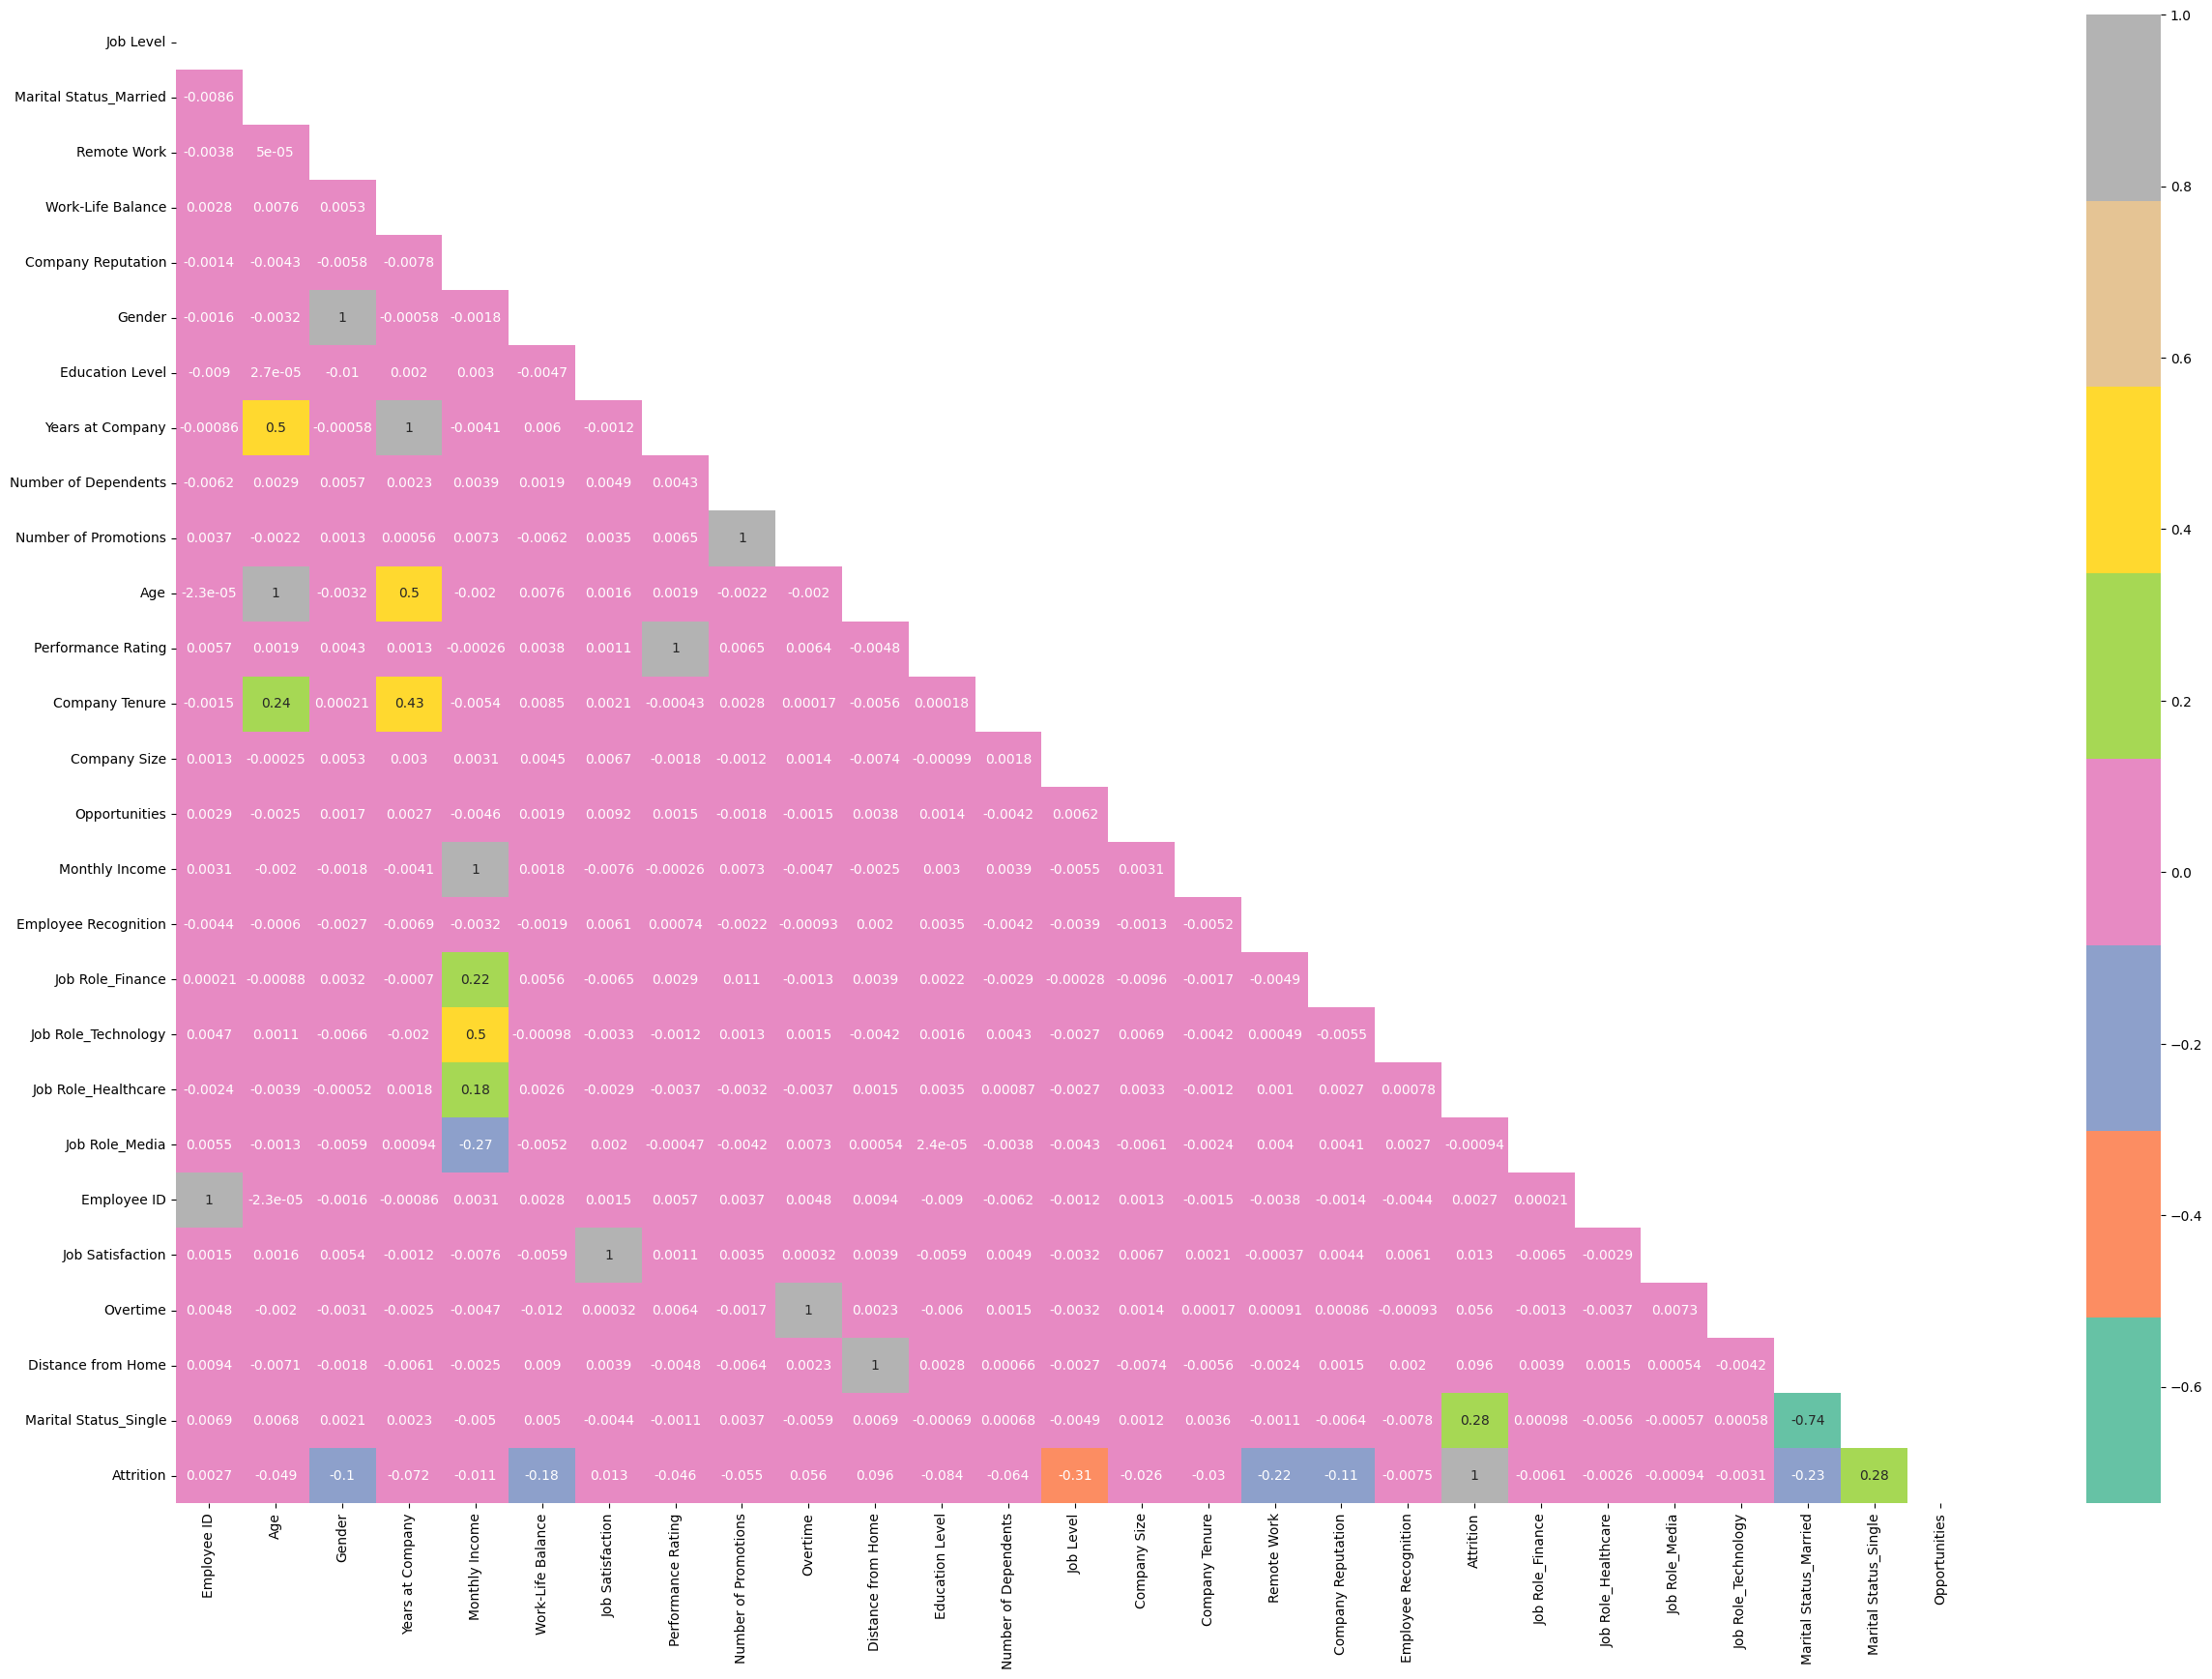

In [95]:
plt.figure(figsize=(30, 20))
corr = df.corr(numeric_only=True).sort_values(by='Attrition',ascending=True)
sns.heatmap(corr, annot=True, cmap='Set2', mask=np.triu(corr))

#### Multicollinearity

In [96]:
X = df.drop(columns=['Attrition'])
zero_var_cols = X.columns[X.nunique() <= 1]
print("Columns with zero variance ignore in VIF output as it should NAN:", zero_var_cols)

Columns with zero variance ignore in VIF output as it should NAN: Index([], dtype='object')


#### VIF

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

"""
    Calculate VIF for each feature in a dataframe.
    Input: DataFrame with only independent variables
    Output: DataFrame with features and their VIF scores
"""

X = df.drop(columns=['Attrition'])  # independent vars
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF Threshold greater than 10 can be removed")
print(vif_data)

VIF Threshold greater than 10 can be removed
                   feature        VIF
0              Employee ID   3.814862
1                      Age  13.734971
2                   Gender   2.180717
3         Years at Company  10.128435
4           Monthly Income  29.978433
5        Work-Life Balance   3.745132
6         Job Satisfaction   4.959465
7       Performance Rating   4.820353
8     Number of Promotions   1.908684
9                 Overtime   1.472962
10      Distance from Home   3.888991
11         Education Level   1.001709
12    Number of Dependents   2.598328
13               Job Level   2.100928
14            Company Size   2.586211
15          Company Tenure   6.948223
16             Remote Work   1.231194
17      Company Reputation   3.482728
18    Employee Recognition   2.033701
19        Job Role_Finance   3.031297
20     Job Role_Healthcare   3.815089
21          Job Role_Media   1.999122
22     Job Role_Technology   5.536751
23  Marital Status_Married   4.034974
24   

### Build the model

#### Split the dependent and independent variable

In [98]:
X = df.drop(columns=['Attrition','Employee ID'], axis=1)
y = df['Attrition']

#### Split the train and test dataset

In [99]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

#### Save the train and test dataset

In [100]:
import os
import shutil

folder = "artifacts"

# If folder exists, delete it
if os.path.exists(folder):
    shutil.rmtree(folder)

# Recreate the folder
os.makedirs(folder, exist_ok=True)

x_train.to_csv("artifacts/x_train.csv", index=False)
x_test.to_csv("artifacts/x_test.csv", index=False)
y_train.to_csv("artifacts/y_train.csv", index=False)
y_test.to_csv("artifacts/y_test.csv", index=False)

#### Feature scaling

In [101]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(x_train),index=x_train.index, columns=x_train.columns)
X_test_scaled =  pd.DataFrame(scaler.transform(x_test), index=x_test.index, columns=x_test.columns)

In [102]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(41718, 25)
(17880, 25)
(41718,)
(17880,)


#### Generic method to build all the models

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    ConfusionMatrixDisplay, RocCurveDisplay
)
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, BaggingClassifier, AdaBoostClassifier,
    GradientBoostingClassifier, StackingClassifier, VotingClassifier
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


def assess_overfitting(row, cv):
    """Assess relative overfitting risk using train/test F1 and CV scores."""
    train_f1 = row["Train F1"]
    test_f1 = row["Test F1"]

    cv_mean = row[f"CV F1 Mean ({cv}-fold)"]
    cv_std = row[f"CV F1 Std ({cv}-fold)"]

    # Relative gap
    rel_gap = (train_f1 - test_f1) / train_f1

    # Check CV agreement
    cv_agreement = abs(test_f1 - cv_mean) <= cv_std

    if rel_gap > 0.15 and not cv_agreement:
        return "High"
    elif rel_gap > 0.1:
        return "Medium"
    else:
        return "Low"

def plot_roc_curves(model, X_tr, y_tr, X_te, y_te, n_classes, name):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f"{name} - ROC Curves", fontsize=14)

    if n_classes == 2:
        # Binary ROC (normal case)
        RocCurveDisplay.from_estimator(model, X_tr, y_tr, ax=axes[0], name="Train")
        axes[0].set_title("ROC Curve (Train)")

        RocCurveDisplay.from_estimator(model, X_te, y_te, ax=axes[1], name="Test")
        axes[1].set_title("ROC Curve (Test)")

    else:
        # Multiclass OvR ROC
        y_train_bin = label_binarize(y_tr, classes=np.unique(y_tr))
        y_test_bin = label_binarize(y_te, classes=np.unique(y_te))

        y_train_proba = model.predict_proba(X_tr)
        y_test_proba = model.predict_proba(X_te)

        for i, cls in enumerate(np.unique(y_tr)):
            RocCurveDisplay.from_predictions(
                y_train_bin[:, i], y_train_proba[:, i],
                name=f"Class {cls}", ax=axes[0]
            )
        axes[0].set_title("ROC Curve (Train)")

        for i, cls in enumerate(np.unique(y_te)):
            RocCurveDisplay.from_predictions(
                y_test_bin[:, i], y_test_proba[:, i],
                name=f"Class {cls}", ax=axes[1]
            )
        axes[1].set_title("ROC Curve (Test)")

    plt.tight_layout()
    plt.show()


def evaluate_models(X_train, X_test, y_train, y_test,
                    X_scaled_train, X_scaled_test,
                    cv,
                    tune_hyperparameters=False,
                    ranking_metric="Test F1"):
    """
    Evaluate multiple ML models (binary or multiclass).
    """

    results = []
    feature_names = X_train.columns

    # Models that REQUIRE scaling
    models_scaled = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "KNN": KNeighborsClassifier(),
        "SVM": SVC(probability=True),
    }

    # Models that DO NOT require scaling
    models_unscaled = {
        "Decision Tree-Gini": DecisionTreeClassifier(),
        "Decision Tree-Entropy": DecisionTreeClassifier(criterion='entropy'),
        "Random Forest": RandomForestClassifier(),
        "XGBoost": XGBClassifier(eval_metric="logloss"),
        "Naive Bayes": GaussianNB(),
        "Bagging": BaggingClassifier(),
        "AdaBoost": AdaBoostClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(),
    }

    # Hyperparameter grids
    # Hyperparameter grids (tuned to reduce overfitting)
    param_grids = {
        "Logistic Regression": {
            "C": [0.01, 0.1, 1, 5],
            "penalty": ["l2"],
            "solver": ["lbfgs", "saga"],
            "max_iter": [2000]
        },
        "KNN": {
            "n_neighbors": [5, 7, 9, 11],     # avoid too small k
            "weights": ["uniform", "distance"]
        },
        "SVM": {
            "C": [0.1, 1, 10],
            "kernel": ["rbf"],
            "gamma": ["scale", 0.1]            # avoid very small gamma
        },
        "Decision Tree-Gini": {
            "max_depth": [3, 5, 7],            # limit depth
            "min_samples_split": [10, 20],
            "min_samples_leaf": [5, 10]
        },
        "Decision Tree-Entropy": {
            "max_depth": [3, 5, 7],
            "min_samples_split": [10, 20],
            "min_samples_leaf": [5, 10]
        },
        "Random Forest": {
            "n_estimators": [100, 200],
            "max_depth": [5, 10],
            "min_samples_split": [10, 20],
            "min_samples_leaf": [5, 10],
            "max_features": ["sqrt"]           # restrict features per split
        },
        "XGBoost": {
            "n_estimators": [100, 200],
            "max_depth": [3, 5],
            "learning_rate": [0.05, 0.1],
            "subsample": [0.7, 0.9],           # prevent overfitting
            "colsample_bytree": [0.7, 0.9],
            "min_child_weight": [3, 5]
        },
        "Gradient Boosting": {
            "n_estimators": [100, 200],
            "max_depth": [3, 5],
            "learning_rate": [0.05, 0.1],
            "subsample": [0.7, 0.9]
        },
        "Naive Bayes": {
            "var_smoothing": np.logspace(-9, -2, 5)
        },
        "Bagging": {
            "n_estimators": [50, 100],
            "max_samples": [0.5, 0.7],
            "max_features": [0.5, 0.7]
        },
        "AdaBoost": {
            "n_estimators": [100, 200],
            "learning_rate": [0.05, 0.1, 0.5]
        }
    }

    def run_model(name, model, X_tr, X_te, X_full, y_tr, y_te, y_full, feature_names, cv):
        """Train, evaluate, plot confusion matrix & ROC, and extract feature importance."""

        # Hyperparameter tuning
        if tune_hyperparameters and name in param_grids:
            grid = GridSearchCV(
                model,
                param_grids[name],
                cv=StratifiedKFold(n_splits=cv, shuffle=True, random_state=42),
                scoring="f1_weighted",
                n_jobs=-1
            )
            grid.fit(X_tr, y_tr)
            model = grid.best_estimator_
            print(f"Best hyperparameters for {name}: {grid.best_params_}")

        # Train
        model.fit(X_tr, y_tr)

        # Predictions
        y_pred_train = model.predict(X_tr)
        y_pred_test = model.predict(X_te)

        # Multi vs Binary
        n_classes = len(np.unique(y_full))
        average_metric = 'weighted'

        # --- Metrics ---
        metrics = {
            "Algorithm": name,
            "Train Accuracy": accuracy_score(y_tr, y_pred_train),
            "Train Precision": precision_score(y_tr, y_pred_train, average=average_metric),
            "Train Recall": recall_score(y_tr, y_pred_train, average=average_metric),
            "Train F1": f1_score(y_tr, y_pred_train, average=average_metric),
            "Test Accuracy": accuracy_score(y_te, y_pred_test),
            "Test Precision": precision_score(y_te, y_pred_test, average=average_metric),
            "Test Recall": recall_score(y_te, y_pred_test, average=average_metric),
            "Test F1": f1_score(y_te, y_pred_test, average=average_metric),
        }

        # ROC-AUC
        plot_roc_curves(model, X_tr, y_tr, X_te, y_te, n_classes, name)

        # CV
        cv_scores = cross_val_score(model, X_tr, y_tr, cv=cv, scoring="f1_weighted")
        metrics[f"CV F1 Mean ({cv}-fold)"] = cv_scores.mean()
        metrics[f"CV F1 Std ({cv}-fold)"] = cv_scores.std()

        results.append(metrics)

        # Confusion Matrix
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        fig.suptitle(f"{name} - Confusion Matrices", fontsize=14)
        ConfusionMatrixDisplay.from_estimator(model, X_tr, y_tr, ax=axes[0], cmap="Blues", colorbar=False)
        axes[0].set_title("Train")
        ConfusionMatrixDisplay.from_estimator(model, X_te, y_te, ax=axes[1], cmap="Oranges_r", colorbar=False)
        axes[1].set_title("Test")
        plt.tight_layout()
        plt.show()


        # Feature Importances
        try:
            if hasattr(model, "coef_"):
                coefs = pd.Series(model.coef_[0], index=feature_names)
                top_features = coefs.sort_values(ascending=False).head(10)
                print(f"\nTop features for {name} (coefficients):\n", top_features)
                top_features.plot(kind="bar", figsize=(8, 4), title=f"Top Features - {name}")
                plt.show()
            elif hasattr(model, "feature_importances_"):
                importances = pd.Series(model.feature_importances_, index=feature_names)
                top_features = importances.sort_values(ascending=False).head(10)
                print(f"\nTop features for {name} (feature_importances_):\n", top_features)
                top_features.plot(kind="bar", figsize=(8, 4), title=f"Top Features - {name}")
                plt.show()
            else:
                print(f"Feature importance not available for {name}(no coef_ or feature_importances_ attribute)")
        except Exception as e:
            print(f"Could not extract feature importance for {name} → {e}")

    # Run scaled
    for name, model in models_scaled.items():
        print(f"************ Started {name} ************")
        run_model(name, model,
                  X_scaled_train, X_scaled_test, pd.concat([X_scaled_train, X_scaled_test]),
                  y_train, y_test, pd.concat([y_train, y_test]),
                  feature_names, cv)
        print("*" * 100)

    # Run unscaled
    for name, model in models_unscaled.items():
        print(f"************ Started {name} ************")
        run_model(name, model,
                  X_train, X_test, pd.concat([X_train, X_test]),
                  y_train, y_test, pd.concat([y_train, y_test]),
                  feature_names, cv)
        print("*" * 100)

    # Stacking
    stacking_clf = StackingClassifier(
        estimators=[
            ("lr", LogisticRegression(max_iter=1000)),
            ("rf", RandomForestClassifier()),
            ("xgb", XGBClassifier(eval_metric="logloss")),
        ],
        final_estimator=LogisticRegression()
    )
    run_model("Stacking", stacking_clf,
              X_train, X_test, pd.concat([X_train, X_test]),
              y_train, y_test, pd.concat([y_train, y_test]),
              feature_names, cv)

    # Voting
    voting_clf = VotingClassifier(
        estimators=[
            ("lr", LogisticRegression(max_iter=1000)),
            ("rf", RandomForestClassifier()),
            ("xgb", XGBClassifier(eval_metric="logloss")),
        ],
        voting='soft'
    )
    run_model("Voting", voting_clf,
              X_train, X_test, pd.concat([X_train, X_test]),
              y_train, y_test, pd.concat([y_train, y_test]),
              feature_names, cv)

    # Leaderboard
    leaderboard = pd.DataFrame(results)
    leaderboard["Overfitting Risk"] = leaderboard.apply(lambda row: assess_overfitting(row, cv), axis=1)
    leaderboard = leaderboard.sort_values(by=ranking_metric, ascending=False).reset_index(drop=True)

    # print("\n===================== MODEL LEADERBOARD =====================")
    # print(leaderboard[["Algorithm", "Train F1", "Test F1",
    #                    f"CV F1 Mean ({cv}-fold)", f"CV F1 Std ({cv}-fold)",
    #                    "Overfitting Risk"]])

    return leaderboard


#### Model Building -> Without Hyperparameter tunning

************ Started Logistic Regression ************


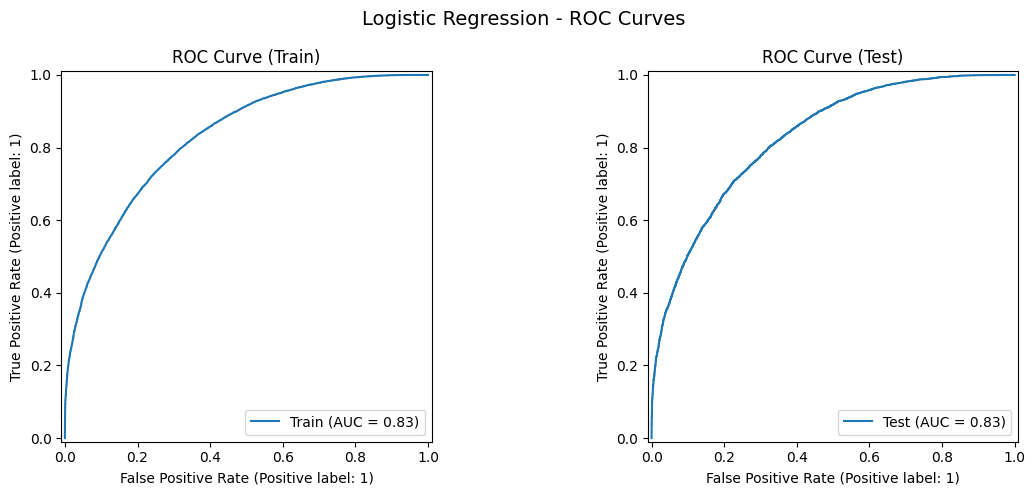

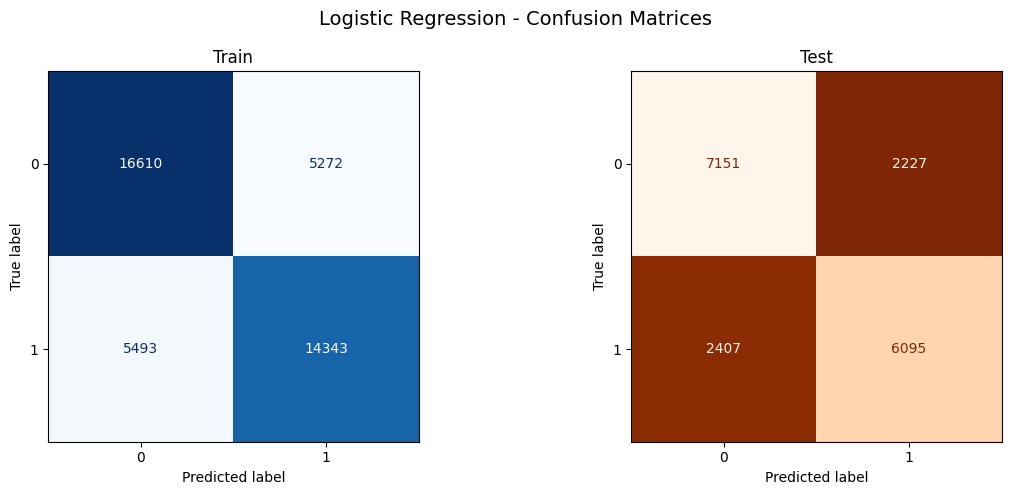


Top features for Logistic Regression (coefficients):
 Marital Status_Single    0.724134
Distance from Home       0.275979
Overtime                 0.164296
Job Satisfaction         0.045333
Company Tenure          -0.002435
Monthly Income          -0.014798
Employee Recognition    -0.016946
Job Role_Healthcare     -0.027941
Job Role_Media          -0.034559
Job Role_Finance        -0.038744
dtype: float64


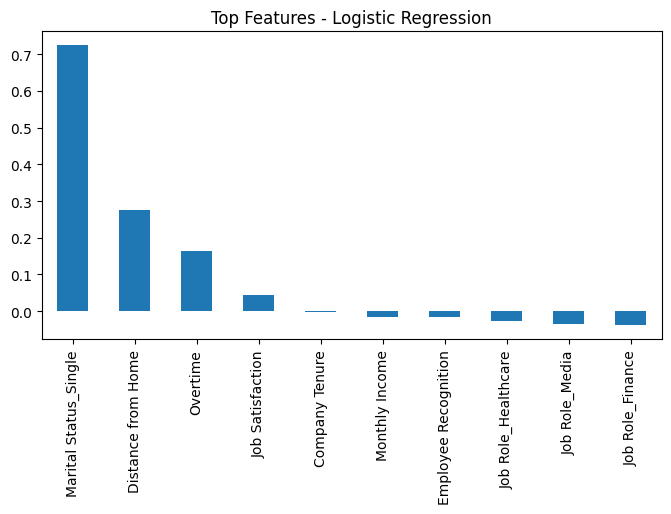

****************************************************************************************************
************ Started KNN ************


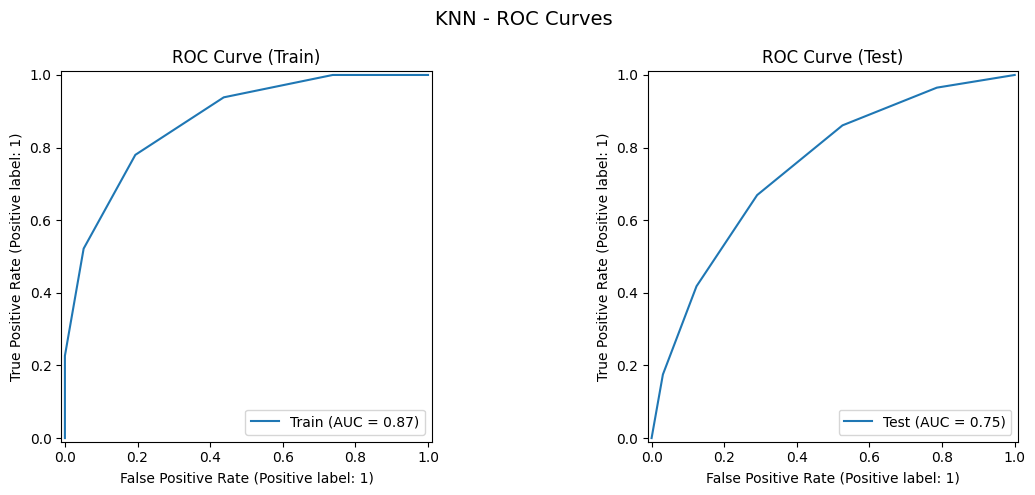

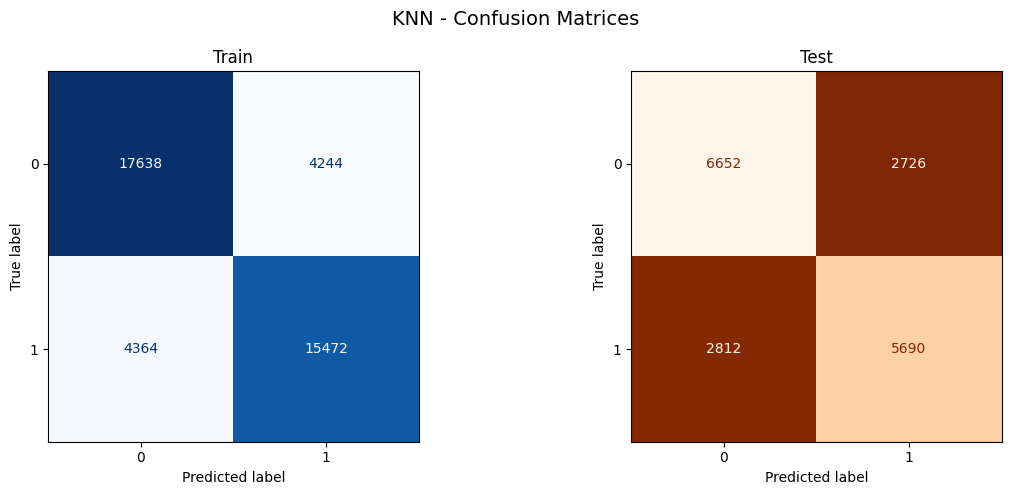

Feature importance not available for KNN(no coef_ or feature_importances_ attribute)
****************************************************************************************************
************ Started SVM ************


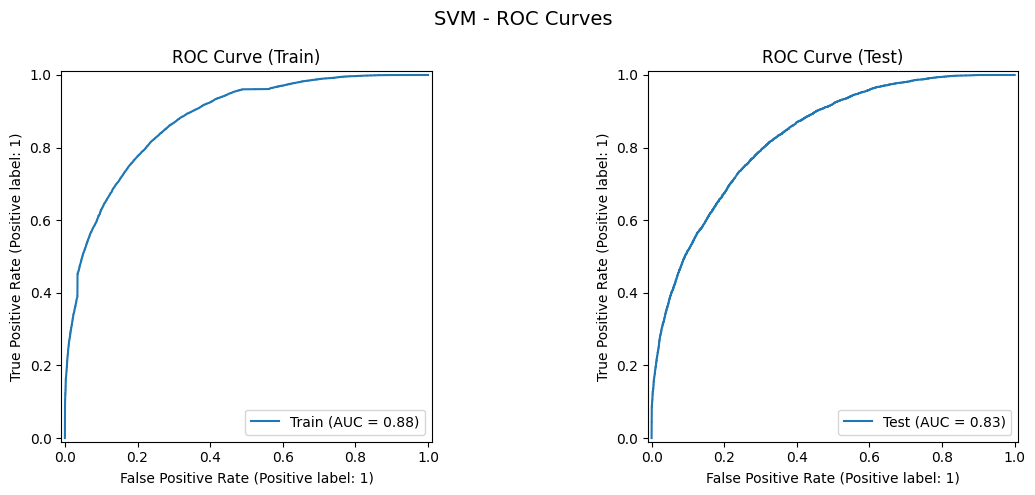

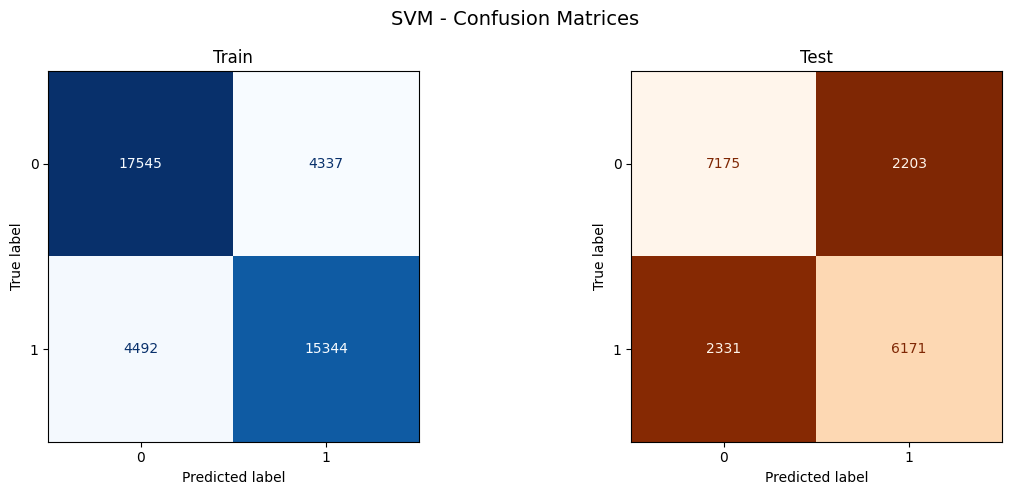

Feature importance not available for SVM(no coef_ or feature_importances_ attribute)
****************************************************************************************************
************ Started Decision Tree-Gini ************


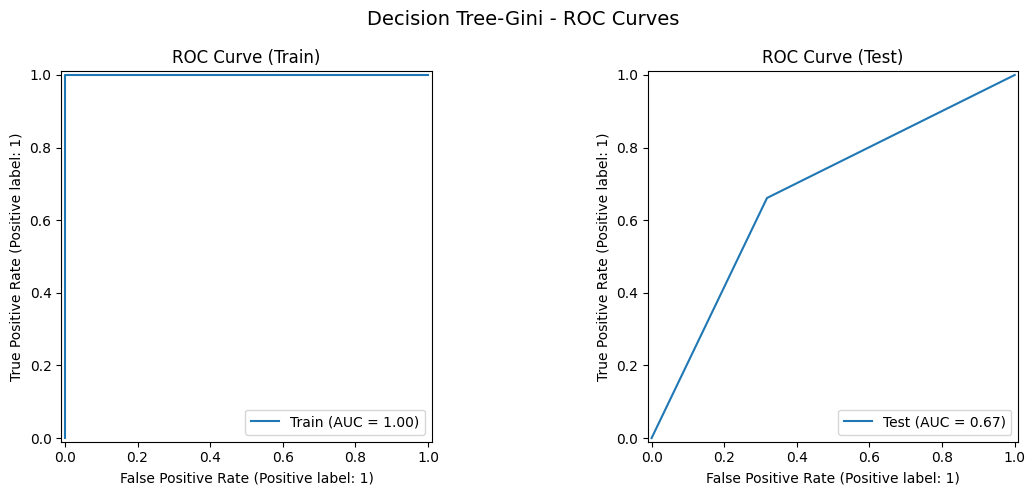

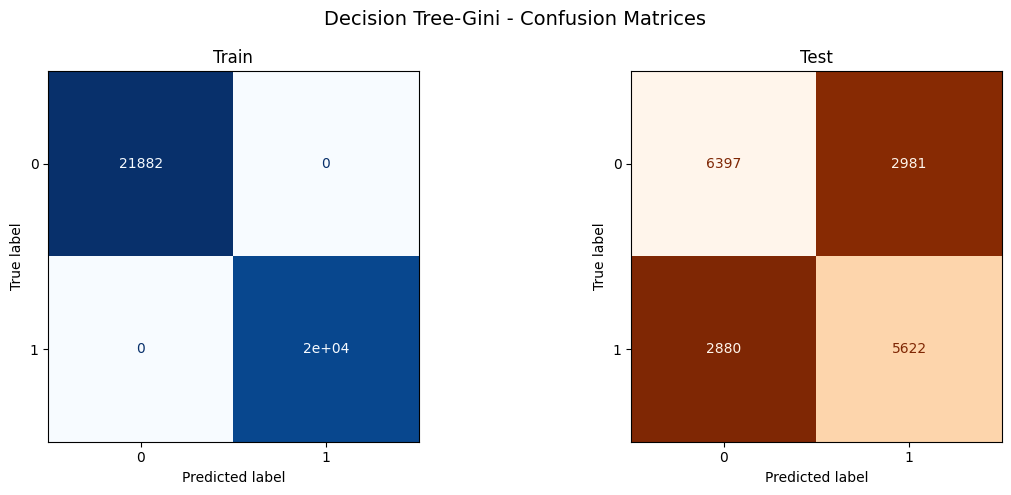


Top features for Decision Tree-Gini (feature_importances_):
 Job Level                0.100107
Distance from Home       0.094257
Monthly Income           0.092902
Company Tenure           0.086551
Marital Status_Single    0.079204
Age                      0.071422
Years at Company         0.070885
Work-Life Balance        0.053150
Remote Work              0.050976
Number of Dependents     0.039521
dtype: float64


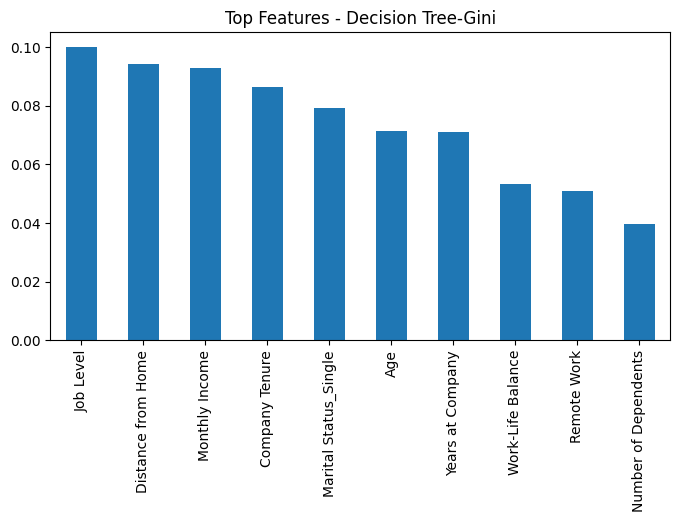

****************************************************************************************************
************ Started Decision Tree-Entropy ************


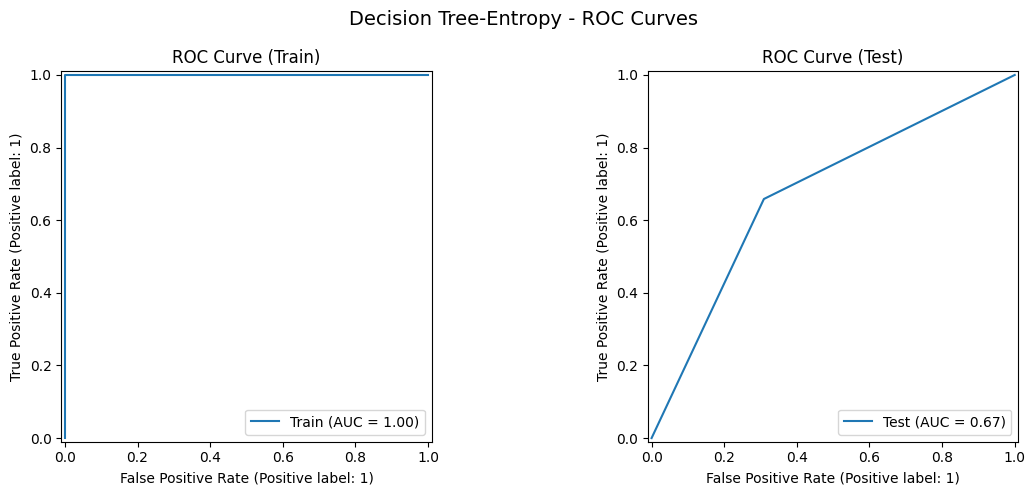

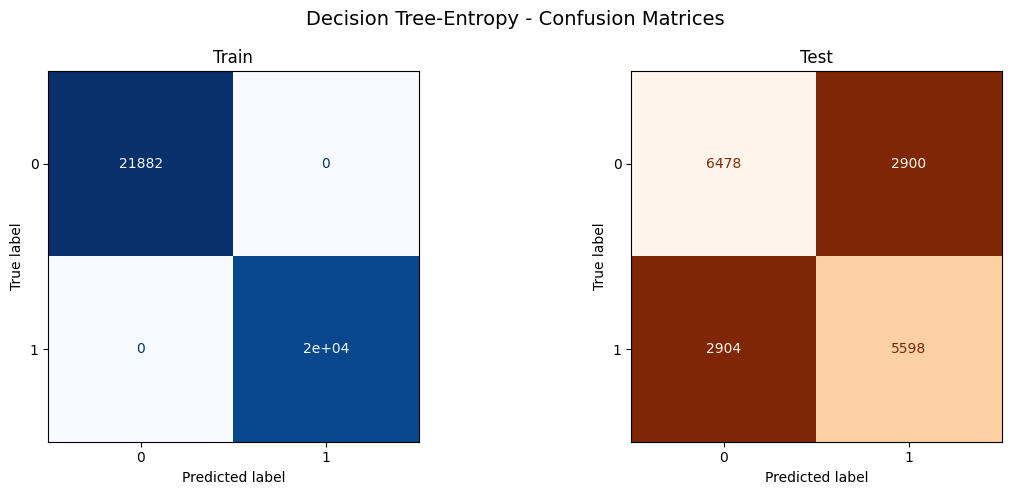


Top features for Decision Tree-Entropy (feature_importances_):
 Distance from Home       0.102105
Monthly Income           0.100709
Company Tenure           0.084446
Job Level                0.080810
Age                      0.077604
Years at Company         0.074494
Marital Status_Single    0.062402
Work-Life Balance        0.048845
Number of Dependents     0.044053
Remote Work              0.043881
dtype: float64


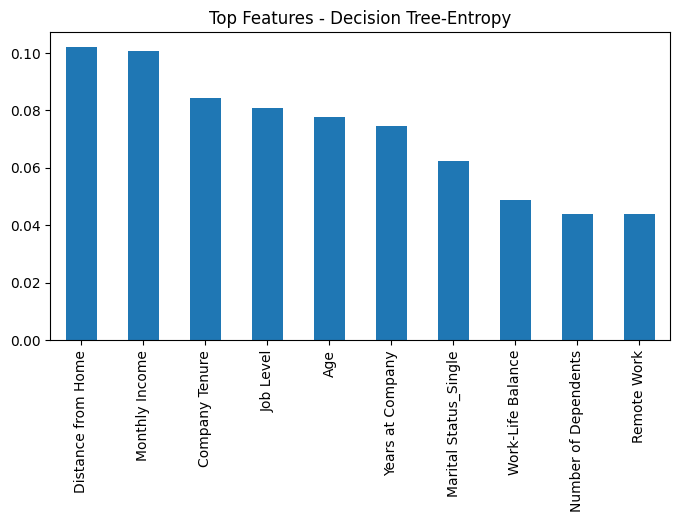

****************************************************************************************************
************ Started Random Forest ************


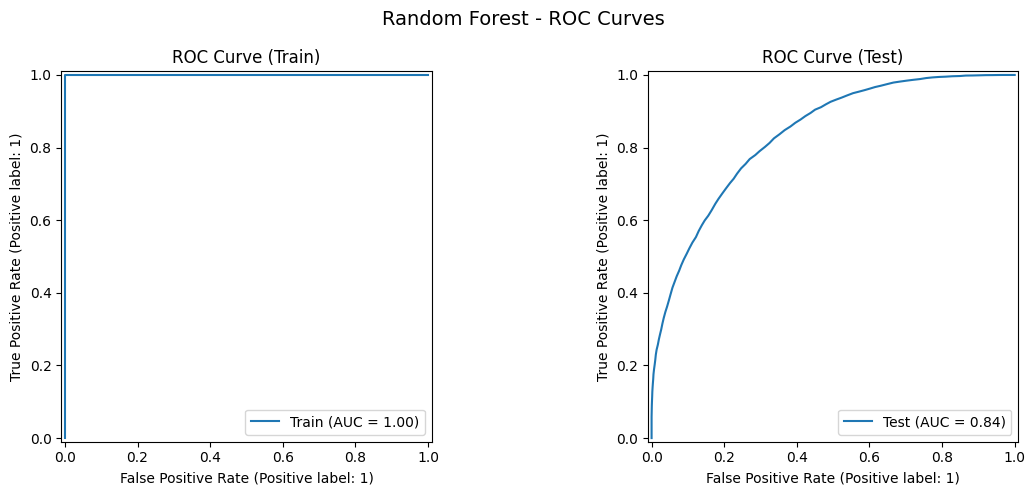

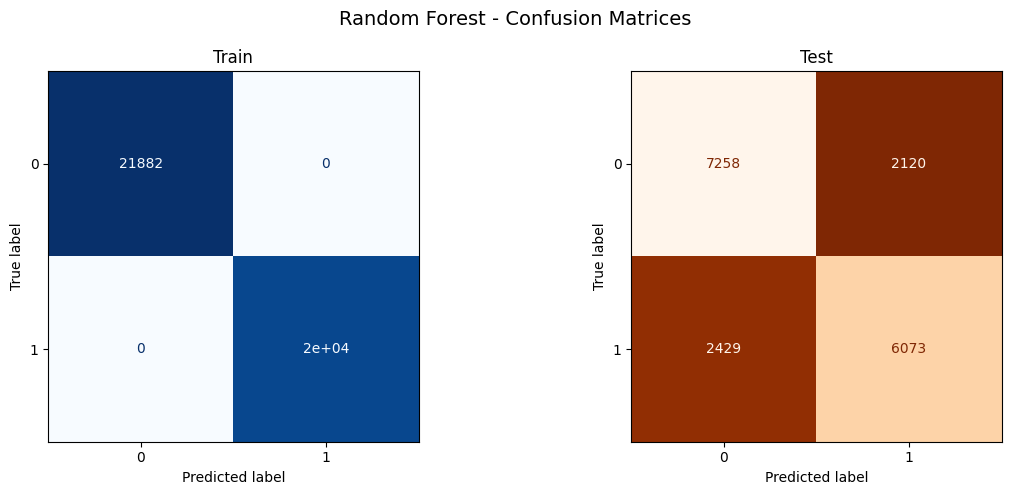


Top features for Random Forest (feature_importances_):
 Job Level                0.099918
Distance from Home       0.086095
Monthly Income           0.082805
Company Tenure           0.077863
Age                      0.070678
Years at Company         0.069340
Work-Life Balance        0.053102
Marital Status_Single    0.053050
Remote Work              0.047859
Number of Dependents     0.042386
dtype: float64


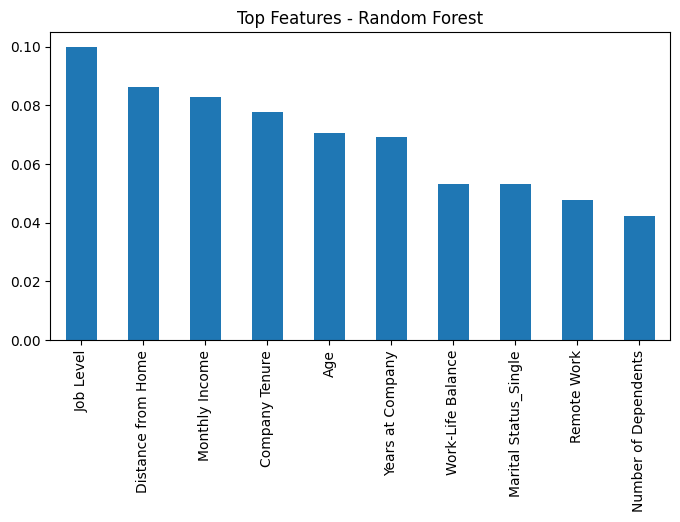

****************************************************************************************************
************ Started XGBoost ************


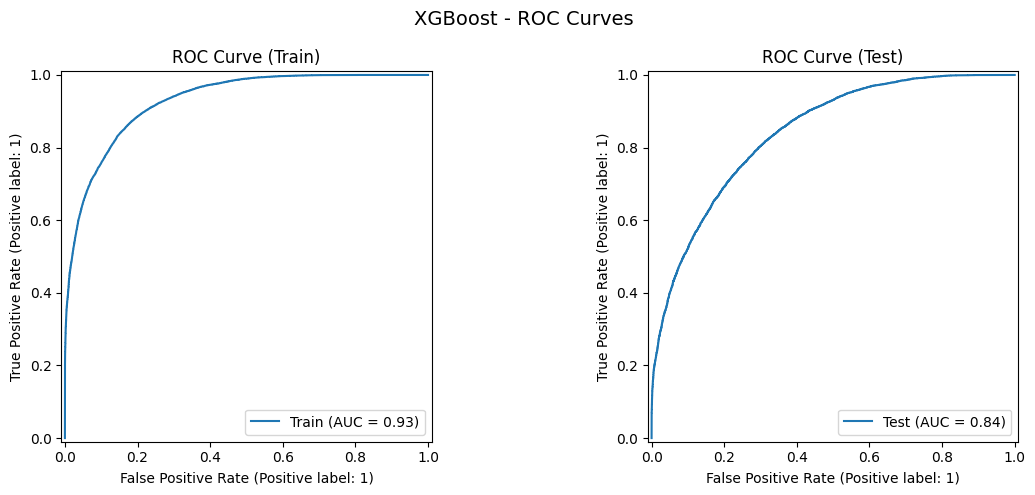

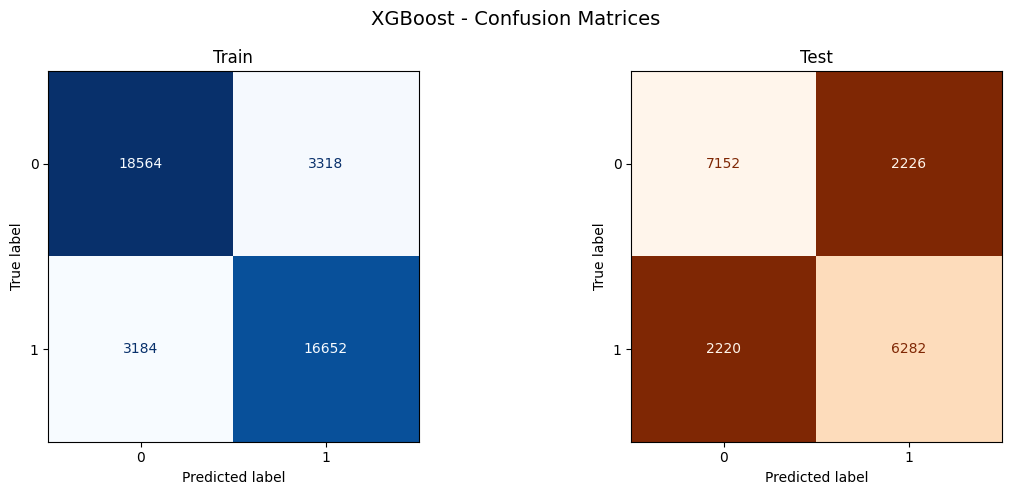


Top features for XGBoost (feature_importances_):
 Marital Status_Single    0.217617
Job Level                0.162178
Remote Work              0.148588
Work-Life Balance        0.069825
Gender                   0.038776
Education Level          0.035939
Number of Promotions     0.032947
Company Reputation       0.032867
Number of Dependents     0.026472
Overtime                 0.024653
dtype: float32


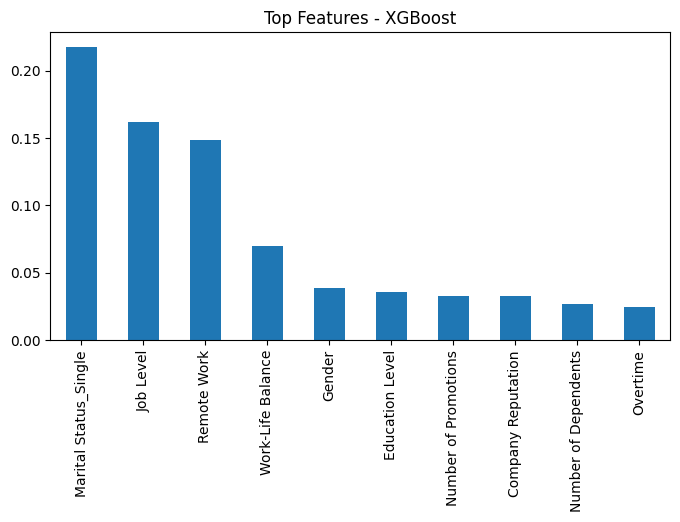

****************************************************************************************************
************ Started Naive Bayes ************


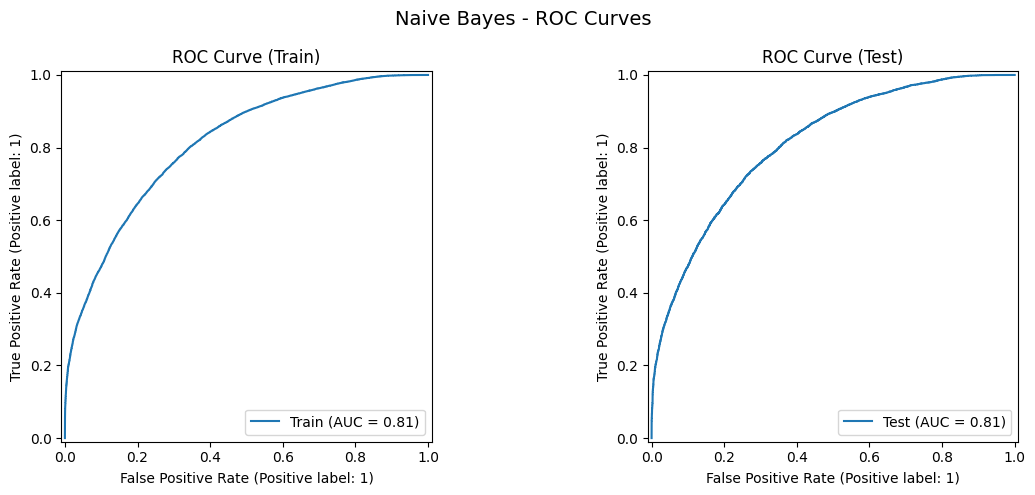

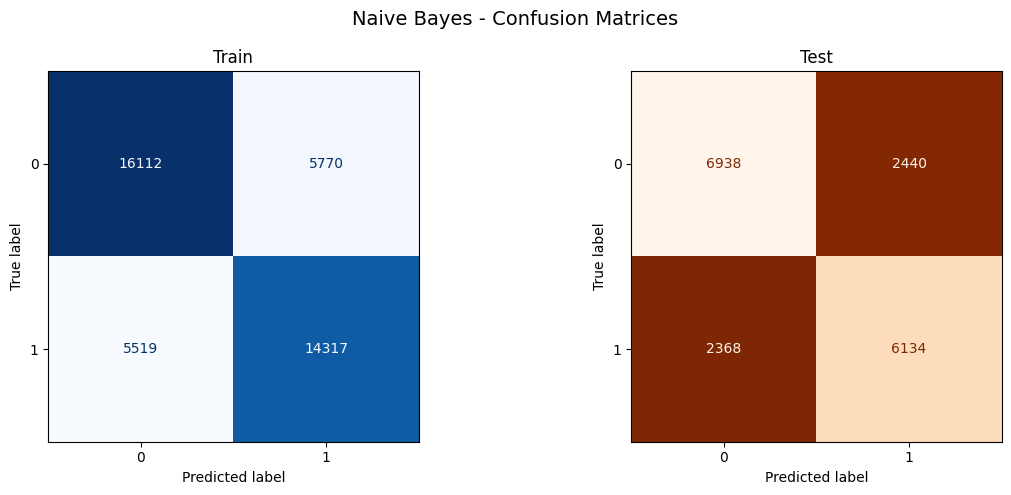

Feature importance not available for Naive Bayes(no coef_ or feature_importances_ attribute)
****************************************************************************************************
************ Started Bagging ************


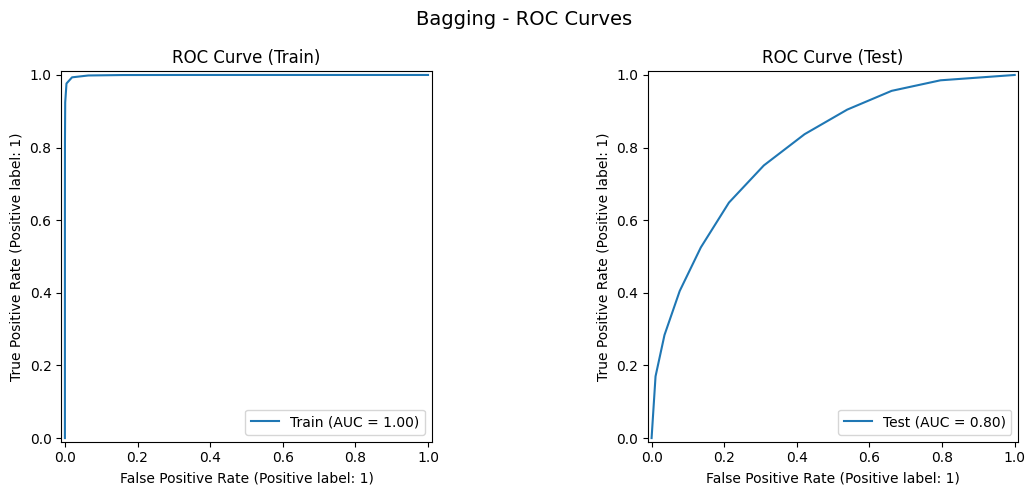

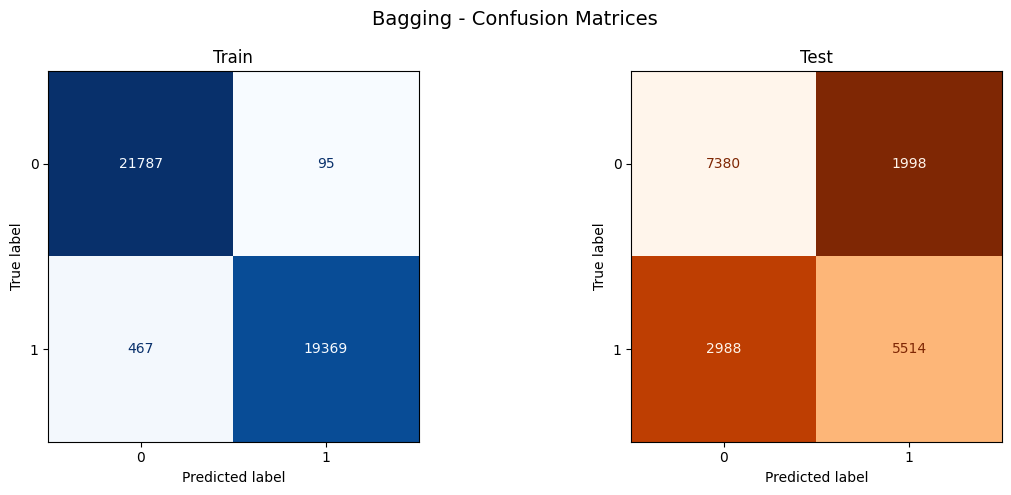

Feature importance not available for Bagging(no coef_ or feature_importances_ attribute)
****************************************************************************************************
************ Started AdaBoost ************


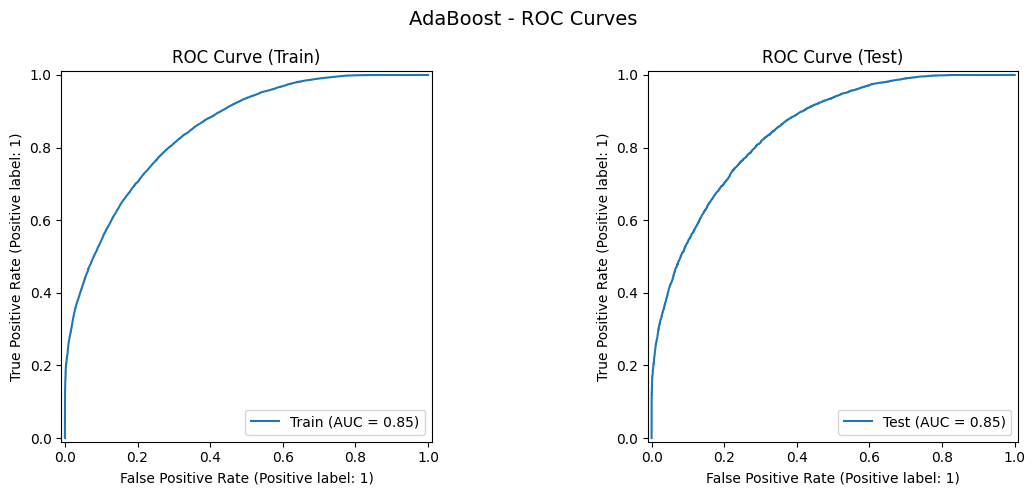

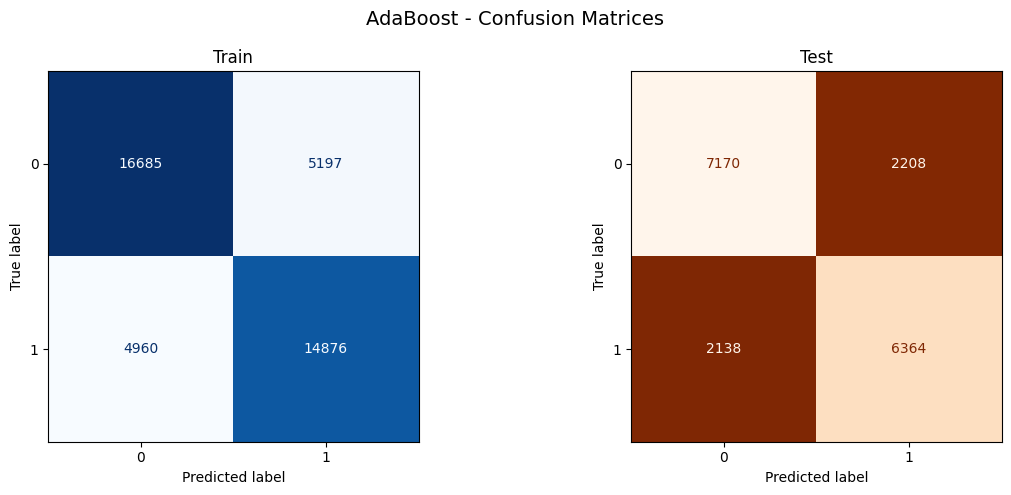


Top features for AdaBoost (feature_importances_):
 Job Level                0.150259
Number of Promotions     0.147043
Remote Work              0.128850
Education Level          0.111082
Marital Status_Single    0.097593
Work-Life Balance        0.065558
Number of Dependents     0.062841
Job Satisfaction         0.039843
Company Reputation       0.035444
Distance from Home       0.033825
dtype: float64


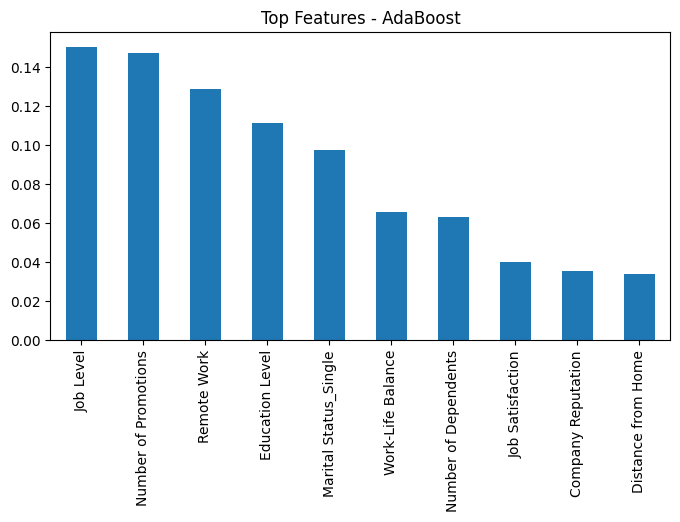

****************************************************************************************************
************ Started Gradient Boosting ************


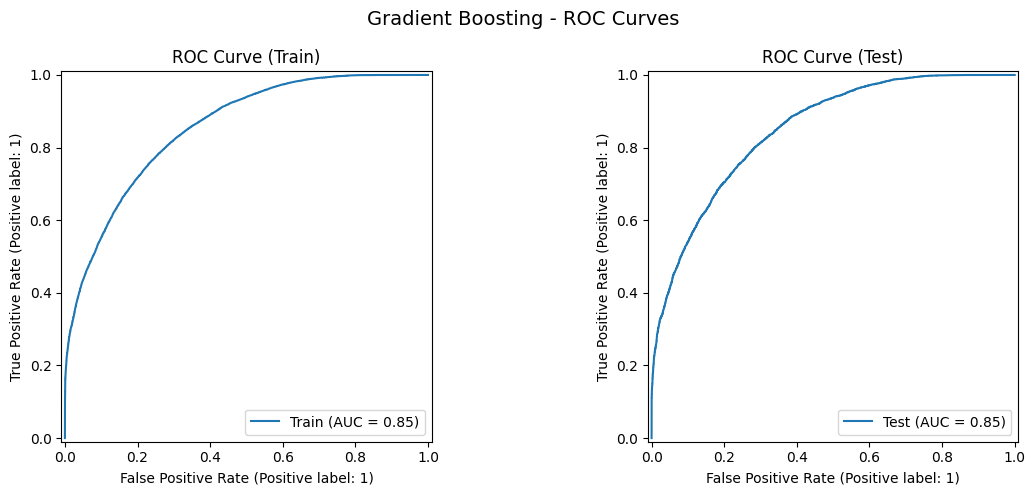

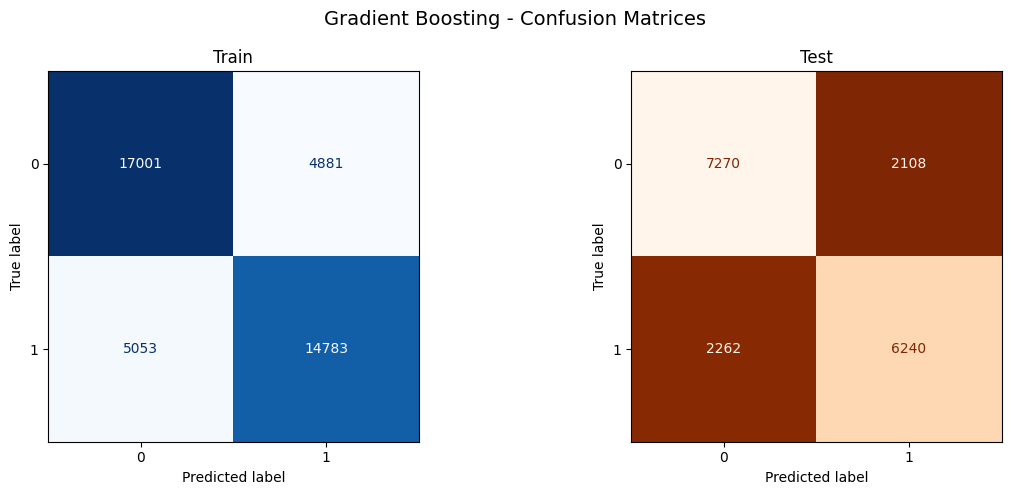


Top features for Gradient Boosting (feature_importances_):
 Job Level                0.276408
Marital Status_Single    0.211659
Remote Work              0.141239
Work-Life Balance        0.109116
Number of Promotions     0.042277
Company Reputation       0.034028
Education Level          0.032150
Distance from Home       0.031659
Number of Dependents     0.031020
Gender                   0.027200
dtype: float64


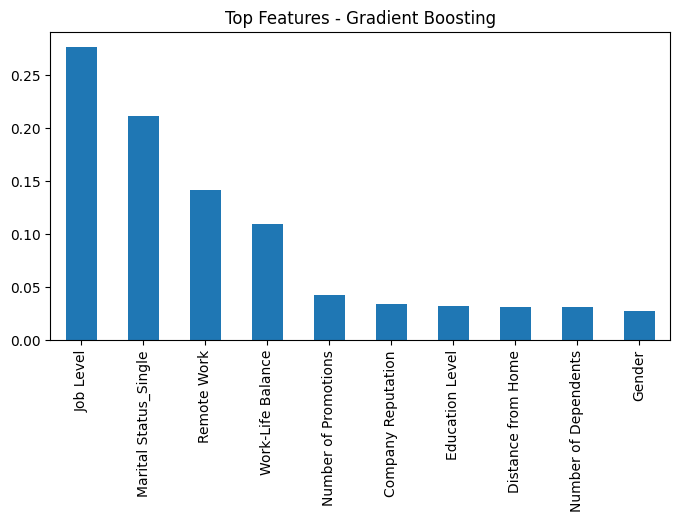

****************************************************************************************************


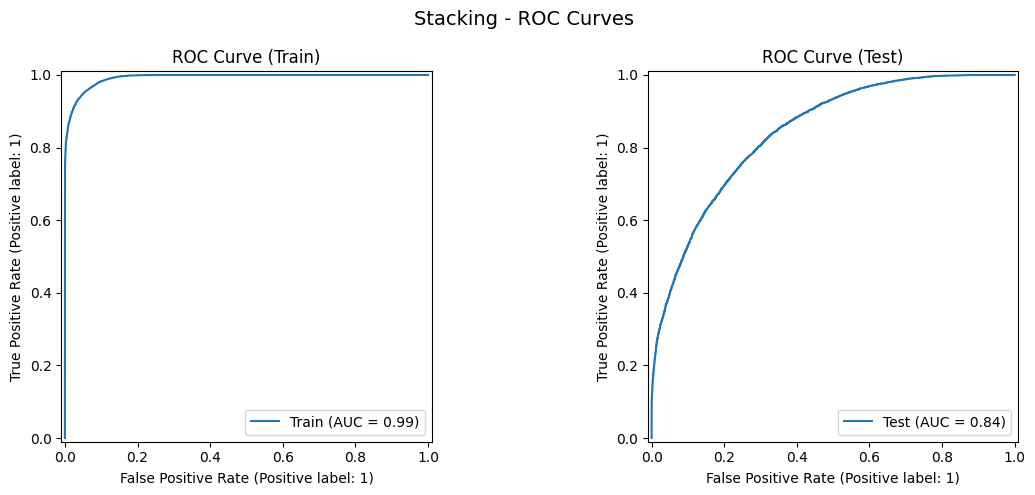

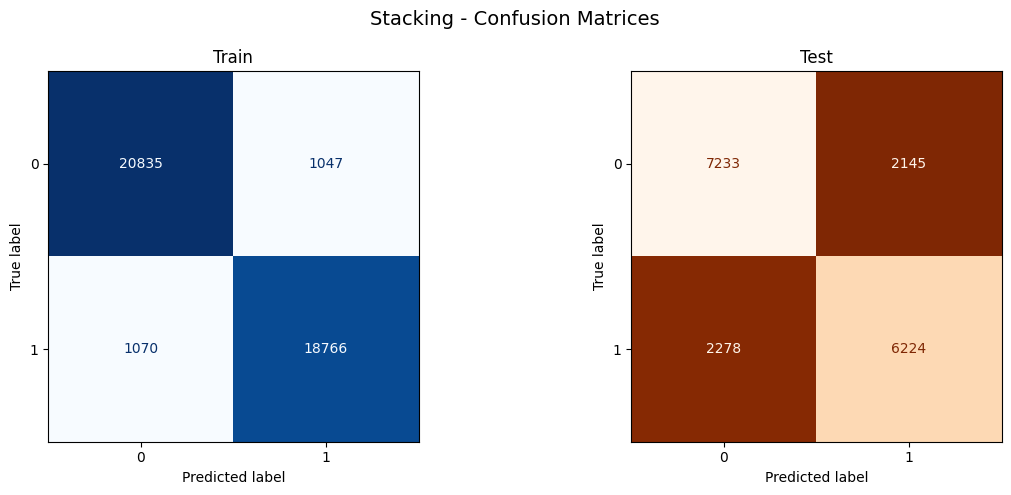

Feature importance not available for Stacking(no coef_ or feature_importances_ attribute)


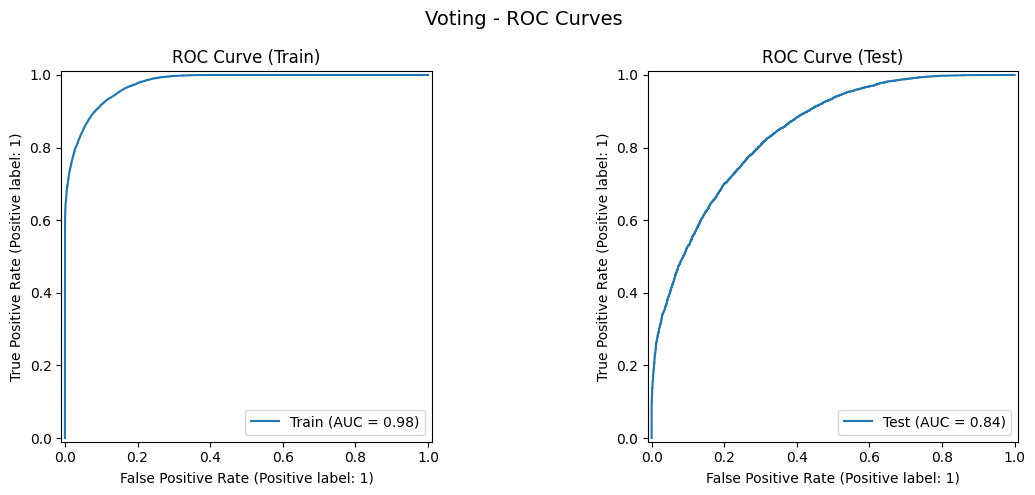

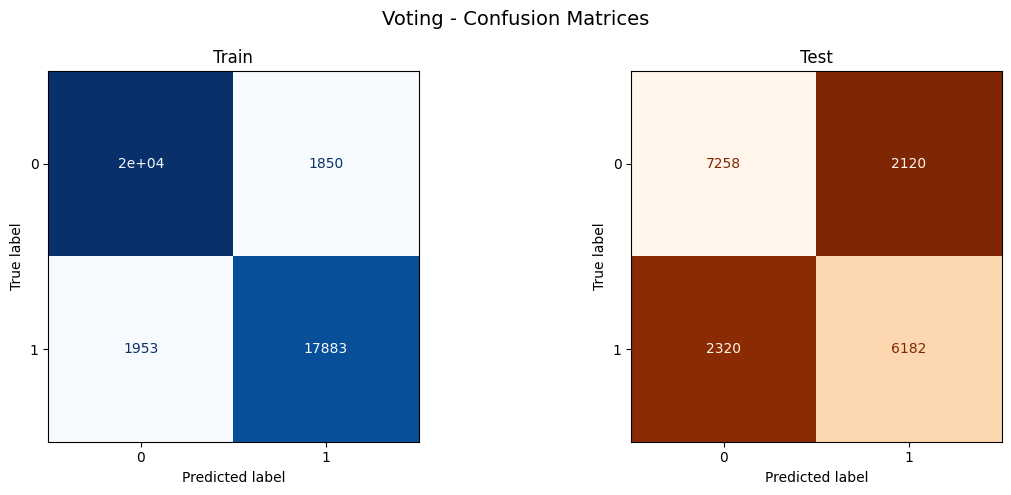

Feature importance not available for Voting(no coef_ or feature_importances_ attribute)


,Algorithm,Train Accuracy,Train Precision,Train Recall,Train F1,Test Accuracy,Test Precision,Test Recall,Test F1,CV F1 Mean (10-fold),CV F1 Std (10-fold),Overfitting Risk
0,AdaBoost,0.756532,0.756701,0.756532,0.756592,0.756935,0.757044,0.756935,0.756978,0.755923,0.007977,Low
1,Gradient Boosting,0.761877,0.761799,0.761877,0.761825,0.755593,0.755462,0.755593,0.755471,0.756242,0.007544,Low
2,Stacking,0.949255,0.949252,0.949255,0.949253,0.752629,0.752504,0.752629,0.752524,0.751210,0.007924,Medium
3,Voting,0.908840,0.908828,0.908840,0.908829,0.751678,0.751531,0.751678,0.751510,0.752615,0.008370,Medium
4,XGBoost,0.844144,0.844207,0.844144,0.844167,0.751342,0.751351,0.751342,0.751346,0.746592,0.006540,Medium
5,SVM,0.788365,0.788303,0.788365,0.788323,0.746421,0.746293,0.746421,0.746318,0.742900,0.004884,Low
6,Random Forest,1.000000,1.000000,1.000000,1.000000,0.745582,0.745443,0.745582,0.745289,0.742697,0.006603,Medium
7,Logistic Regression,0.741958,0.741851,0.741958,0.741883,0.740828,0.740669,0.740828,0.740673,0.742124,0.006796,Low
8,Naive Bayes,0.729397,0.729591,0.729397,0.729468,0.731096,0.731217,0.731096,0.731145,0.729489,0.007598,Low
9,Bagging,0.986529,0.986672,0.986529,0.986522,0.721141,0.722371,0.721141,0.719512,0.712303,0.006203,High


In [104]:
model_eval = evaluate_models(
    x_train, x_test, y_train, y_test,
    X_train_scaled, X_test_scaled,
    10, False
)
display(model_eval)

#### Model Building -> With Hyperparameter tunning

In [ ]:
model_eval = evaluate_models(
    x_train, x_test, y_train, y_test,
    X_train_scaled, X_test_scaled,
    10, True
)
display(model_eval)

#### Summary:

Here is a summary of its performance:

- Algorithm: XGBoost
- Train F1 Score: 0.963
- Test F1 Score: 0.938
- CV F1 Mean (10-fold): 0.937
- Overfitting Risk: Low

This model demonstrates strong performance on unseen data and a low risk of overfitting, making it a good candidate for deployment in a customer-facing UI. Below is the complete model evaluation leaderboard for your review.

### AdaBoost Model Training and Evaluation

### AdaBoost Model (Simplified)

In [105]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score
)
from sklearn.ensemble import AdaBoostClassifier


# Define model name and instantiate it
name = "AdaBoost Classifier"
model = AdaBoostClassifier(random_state=42) # Added random_state for reproducibility

# Train the model
print(f"************ Started {name} ************")
model.fit(x_train, y_train)

# Make predictions
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# Determine if binary or multiclass for metric averaging
n_classes = len(np.unique(y_train))
average_metric = "binary" if n_classes == 2 else "weighted"

# --- Metrics ---
print(f"\n--- Metrics for {name} ---")
print(f"Train Accuracy: {accuracy_score(y_train, y_pred_train):.3f}")
print(f"Train Precision: {precision_score(y_train, y_pred_train, average=average_metric):.3f}")
print(f"Train Recall: {recall_score(y_train, y_pred_train, average=average_metric):.3f}")
print(f"Train F1: {f1_score(y_train, y_pred_train, average=average_metric):.3f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test):.3f}")
print(f"Test Precision: {precision_score(y_test, y_pred_test, average=average_metric):.3f}")
print(f"Test Recall: {recall_score(y_test, y_pred_test, average=average_metric):.3f}")
print(f"Test F1: {f1_score(y_test, y_pred_test, average=average_metric):.3f}")

# Cross-validation score
cv = 10 # Using 10-fold cross-validation
cv_scores = cross_val_score(model, x_train, y_train, cv=cv, scoring="f1_weighted")
print(f"CV F1 Mean ({cv}-fold): {cv_scores.mean():.3f}")
print(f"CV F1 Std ({cv}-fold): {cv_scores.std():.3f}")

print("\n" + "*" * 100)

************ Started AdaBoost Classifier ************

--- Metrics for AdaBoost Classifier ---
Train Accuracy: 0.757
Train Precision: 0.741
Train Recall: 0.750
Train F1: 0.745
Test Accuracy: 0.757
Test Precision: 0.742
Test Recall: 0.749
Test F1: 0.745

--- Metrics for AdaBoost Classifier ---
Train Accuracy: 0.757
Train Precision: 0.741
Train Recall: 0.750
Train F1: 0.745
Test Accuracy: 0.757
Test Precision: 0.742
Test Recall: 0.749
Test F1: 0.745
CV F1 Mean (10-fold): 0.756
CV F1 Std (10-fold): 0.008

****************************************************************************************************
CV F1 Mean (10-fold): 0.756
CV F1 Std (10-fold): 0.008

****************************************************************************************************


In [107]:
import joblib

artifact = {
    "model": model,
    "ohe": ohe,
    "scaler": scaler,
    "binary_map": BINARY_MAP,
    "ordinal_map": ORDINAL_MAPS,
    "feature_columns": list(x_train.columns)
}

joblib.dump(artifact, "employee_attrition_model.joblib")

print("Generated joblib")

Generated joblib
